<div class="alert alert-block alert-info">
    <b>Projet 7 | Implémentez un modèle de scoring<br></b>
    <p style="color:#8B0000;">
        Notebook |  Notebook EDA & Preprocessing</p>
</div>

# | Présentation du projet et démarche envisagée

## | Projet

Je suis Data Scientist au sein d'une société financière, nommée "Prêt à dépenser",  qui propose des crédits à la consommation pour des personnes ayant peu ou pas du tout d'historique de prêt.

<img src="logo.png" style="width:300px;height:270px"/>

L’entreprise souhaite **mettre en œuvre un outil de “scoring crédit” pour calculer la probabilité** qu’un client rembourse son crédit, puis classifie la demande en crédit accordé ou refusé. Elle souhaite donc développer un **algorithme de classification** en s’appuyant sur des sources de données variées (données comportementales, données provenant d'autres institutions financières, etc.).

De plus, les chargés de relation client ont fait remonter le fait que les clients sont de plus en plus demandeurs de **transparence** vis-à-vis des décisions d’octroi de crédit. Cette demande de transparence des clients va tout à fait dans le sens des valeurs que l’entreprise veut incarner.

**Prêt à dépenser** décide donc de développer un **dashboard interactif** pour que les chargés de relation client puissent à la fois expliquer de façon la plus transparente possible les décisions d’octroi de crédit, mais également permettre à leurs clients de disposer de leurs informations personnelles et de les explorer facilement. 

**Mission**

-  Construire un modèle de scoring qui donnera une prédiction sur la probabilité de faillite d'un client de façon automatique.
-  Construire un dashboard interactif à destination des gestionnaires de la relation client permettant d'interpréter les prédictions faites par le modèle, et d’améliorer la connaissance client des chargés de relation client.

Michaël, mon manager, m'incite à sélectionner un **kernel Kaggle** pour faciliter la préparation des données nécessaires à l’élaboration du modèle de scoring. J'analyserai ce kernel et l’adapterai pour m'assurer qu’il répond aux besoins de ma mission.

Je pourrai ainsi me **focaliser sur l’élaboration du modèle**, son **optimisation** et sa **compréhension**.

**Spécifications du dashboard**

Michaël m'a fourni des spécifications pour le dashboard interactif. Celui-ci devra contenir au minimum les fonctionnalités suivantes :

-  Permettre de visualiser le score et l’interprétation de ce score pour chaque client de façon intelligible pour une personne non experte en data science.
-  Permettre de visualiser des informations descriptives relatives à un client (via un système de filtre).
-  Permettre de comparer les informations descriptives relatives à un client à l’ensemble des clients ou à un groupe de clients similaires.

**Livrables**

-  Le **dashboard interactif** répondant aux spécifications ci-dessus et l’API de prédiction du score, déployées chacunes sur le cloud.
-  Un **dossier** sur un outil de versioning de code contenant :
 - Le code de la modélisation (du prétraitement à la prédiction)
 - Le code générant le dashboard
 - Le code permettant de déployer le modèle sous forme d'API
-  Une **note méthodologique** décrivant :
 - La méthodologie d'entraînement du modèle (2 pages maximum)
 - La fonction coût métier, l'algorithme d'optimisation et la métrique d'évaluation (1 page maximum)
 - L’interprétabilité globale et locale du modèle (1 page maximum)
 - Les limites et les améliorations possibles (1 page maximum)
-  Un **support de présentation** pour la soutenance, détaillant le travail réalisé.

## | Démarche envisagée

### Processus général

In [454]:
# Most features are created by applying min, max, mean, sum and var functions to grouped tables. 
# Little feature selection is done and overfitting might be a problem since many features are related.
# The following key ideas were used:
# - Divide or subtract important features to get rates (like annuity and income)
# - In Bureau Data: create specific features for Active credits and Closed credits
# - In Previous Applications: create specific features for Approved and Refused applications
# - Modularity: one function for each table (except bureau_balance and application_test)
# - One-hot encoding for categorical features
# All tables are joined with the application DF using the SK_ID_CURR key (except bureau_balance).

# - Added Payment Rate feature
# - Removed index from features
# - Use standard KFold CV (not stratified

La plupart des features sont créées en appliquant les fonctions min, max, mean, sum et var à des tables groupées.<br>
Peu de sélection de feature est réalisée, il est possible de rencontrer un problème d'overfitting car de nombreuses features sont corrélées.<br>
Les idées principales suivantes ont été suivies : 
-  diviser ou soustraire des features importants pour obtenir des taux (comme annuity et income)
-  données bureau : création de features spécifiques pour les Active credits et Closed credits
-  données Previous Applications : création de features spécifiques pour les Approved et Refused applications
-  modularité : une fonction pour chaque table (à l'exception de bureau_balance et application_test)
-  one-hot-encoding pour les features catégorielles
-  ajoute du feature Payment Rate
-  index retiré des features

Toutes les tables sont jointes avec le dataframe df application à l'aide de la clé SK_ID_CURR (à l'exception de bureau_balance).

### Kernel pour Feature Engineering : 
LightGBM with Simple Features | https://www.kaggle.com/code/jsaguiar/lightgbm-with-simple-features/script

In [455]:
# %% [code]
# HOME CREDIT DEFAULT RISK COMPETITION
# Most features are created by applying min, max, mean, sum and var functions to grouped tables. 
# Little feature selection is done and overfitting might be a problem since many features are related.
# The following key ideas were used:
# - Divide or subtract important features to get rates (like annuity and income)
# - In Bureau Data: create specific features for Active credits and Closed credits
# - In Previous Applications: create specific features for Approved and Refused applications
# - Modularity: one function for each table (except bureau_balance and application_test)
# - One-hot encoding for categorical features
# All tables are joined with the application DF using the SK_ID_CURR key (except bureau_balance).
# You can use LightGBM with KFold or Stratified KFold.

# Update 16/06/2018:
# - Added Payment Rate feature
# - Removed index from features
# - Use standard KFold CV (not stratified)


# | Import des packages, fonctions et paramétrage initial

## | Reset variables

Notebook variables reset for each complete execution of this code :

In [456]:
%reset -f

## | Vérification de la version de Python

In [457]:
!python -V

Python 3.9.12


## | Installation des nouveaux packages nécessaires

In [458]:
# %pip install autopep8

Le kernel Kaggle identifié pour **l'EDA**, la **préparation** et la **transformation** des données et utilise l'algorithme **LightGBM**. 

Light GBM pour **Light Gradient Boosting Machine** est un framework de **boosting de gradient** distribué qui utilise un algorithme d'apprentissage d'arbres de décision.

Celui-ci requiert une **installation via conda**.
Afin d'éviter d'éventuels problèmes de compatibilité suite à l'installation, je crée un nouvel **environnement** conda **ml2** en **clonant ml1** :

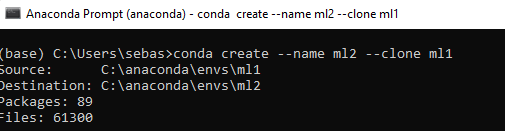

Restart du kernel sur **ml2**, et installation de **LightGBM** sur **ml2**

Installation LightGBM via le **prompt Conda** :<br>conda install -c conda-forge lightgbm

In [459]:
# %pip install kaggle
# %pip install opendatasets

In [460]:
%pip install imblearn

Note: you may need to restart the kernel to use updated packages.


## | Import des librairies utiles au projet

In [461]:
# personalized by SDR :
from IPython.display import display
import os
import re
import autopep8
from zipfile import ZipFile

# from https://github.com/nalron/project_credit_scoring_model/blob/master/p7_01_eda_notebook.ipynb
import glob  # only necessary for Unix

# from Kaggle kernel :
import numpy as np
import pandas as pd
import gc
import time
from sklearn.impute import SimpleImputer
from contextlib import contextmanager

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## | Vérification des versions de package disponibles

In [462]:
!pip list

Package                           Version
--------------------------------- ------------
absl-py                           1.2.0
alembic                           1.8.1
ap-tools                          0.1.4
appdirs                           1.4.4
argon2-cffi                       21.3.0
argon2-cffi-bindings              21.2.0
asttokens                         2.0.5
astunparse                        1.6.3
attrs                             21.4.0
autopep8                          1.6.0
backcall                          0.2.0
beautifulsoup4                    4.11.1
bleach                            4.1.0
blis                              0.7.8
branca                            0.5.0
bs4                               0.0.1
cachetools                        5.2.0
catalogue                         1.0.0
catboost                          1.0.6
certifi                           2022.6.15
cffi                              1.15.0
charset-normalizer                2.1.0
chart-studio          

## | Mise en page et réglages divers du notebook

In [463]:
# Modification des affichages de colonnes, lignes et largeurs de colonnes pour bien visualiser les colonnes
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', 1000)

# Affichage avec la bibliothèque graphique intégrée à Notebook:
%matplotlib inline

# Format des graphiques seaborn
sns.set_theme(style="whitegrid")

## | Fonctions utiles au projet 

### | Timer

In [464]:
@contextmanager
def timer(title):
    t0 = time.time()
    yield
    print("{} - done in {:.0f}s".format(title, time.time() - t0))

### | Description du jeu de données

In [465]:
def data_describe(folder):
    '''Check the number of rows, columns, missing values and duplicates.
       Count type of columns.
       Memory indication'''

    data_dict = {}
    for file in folder:
        print("processing ",file,":")
        data = pd.read_csv(file, encoding_errors='ignore')
        data_dict[file] = [data.shape[0], 
                           data.shape[1],
                            round(data.isna().sum().sum()/data.size*100, 2),
                            round(data.duplicated().sum().sum()/data.size*100, 2),
                            data.select_dtypes(include=['object']).shape[1],
                            data.select_dtypes(include=['float']).shape[1],
                            data.select_dtypes(include=['int']).shape[1],
                            data.select_dtypes(include=['bool']).shape[1],
                            round(data.memory_usage().sum()/1024**2, 3)]

        comparative_table = pd.DataFrame.from_dict(data = data_dict, 
                                                   columns = ['Rows', 'Columns', '%NaN', '%Duplicate', 
                                                              'object_dtype','float_dtype', 'int_dtype', 
                                                              'bool_dtype', 'MB_Memory'], 
                                                   orient='index')
    print("SUMMARY FILES…")
    return(comparative_table)

In [466]:
def features(folder):
    '''Comparative data with missing values, 
       and many descriptive statistics.'''
    
    data_object = {}
    data_numeric = {}
    
    for file in folder:
        data = pd.read_csv(file, encoding_errors='ignore')
        
        data_object[file] = [(x, data[x].dtype, 
                              data[x].isna().sum().sum(),
                              int(data[x].count())) for x in data.select_dtypes(exclude=['int', 'float'])]
        
        data_numeric[file] = [(x, data[x].dtype, 
                               int(data[x].isna().sum().sum()), 
                               int(data[x].count()), 
                               int(data[x].mean()), 
                               round(data[x].std(),1),
                               round(data[x].min(),1), 
                               round(data[x].max(),1)) for x in data.select_dtypes(exclude='object')]
        

    comparative_object = pd.DataFrame.from_dict(data = data_object, orient='index')
    dict_of_object = {name: pd.DataFrame(file) for name,file in data_object.items()}
    df1 = pd.concat(dict_of_object, axis=0)
    df1.columns=['features','dtype','nan','count']
    
    comparative_numeric = pd.DataFrame.from_dict(data = data_numeric, orient='index')
    dict_of_numeric = {name: pd.DataFrame(file) for name,file in data_numeric.items()}
    df2 = pd.concat(dict_of_numeric, axis=0)
    df2.columns=['features','dtype','nan','count', 'mean', 'std', 'min','max']
        
    return df1, df2

### | Missing Values

In [467]:
# Missing Value
def missing_values(data, plot=False):
    mst = pd.DataFrame(
        {"Num_Missing": data.isnull().sum(), 
         "Missing_Ratio": data.isnull().sum() / data.shape[0]}).sort_values(
        "Num_Missing", ascending=False)
    mst["DataTypes"] = data[mst.index].dtypes.values
    mst = mst[mst.Num_Missing > 0].reset_index().rename(
        {"index": "Feature"}, axis=1)

    print("Number of Variables including Missing Values:", mst.shape[0], "\n")

    if mst[mst.Missing_Ratio >= 1.0].shape[0] > 0:
        print("Full Missing Variables:",
              mst[mst.Missing_Ratio >= 1.0].Feature.tolist())
        data.drop(mst[mst.Missing_Ratio >= 1.0].Feature.tolist(),
                  axis=1, inplace=True)

        print("Full missing variables are deleted!", "\n")

    if plot:
        plt.figure(figsize=(25, 8))
        p = sns.barplot(mst.Feature, mst.Missing_Ratio)
        for rotate in p.get_xticklabels():
            rotate.set_rotation(90)
        plt.show()

    print(mst, "\n")

### | One Hot Encoding

In [468]:
# One-hot encoding for categorical columns with get_dummies
def one_hot_encoder(df, nan_as_category = True):
    original_columns = list(df.columns)
    categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
    df = pd.get_dummies(df, columns=categorical_columns, dummy_na=nan_as_category)
    new_columns = [c for c in df.columns if c not in original_columns]
    return df, new_columns

### | application_train & test.csv

In [469]:
# Preprocess application_train.csv and application_test.csv
def application_train_test(num_rows = None, nan_as_category = False):
    # Read data and merge train and test (test : Target = NAN after merge)
    df = pd.read_csv(path + 'application_train.csv', nrows= num_rows)
    test_df = pd.read_csv(path + 'application_test.csv', nrows= num_rows)
    print("Train samples: {}, test samples: {}".format(len(df), len(test_df)))
    df = df.append(test_df).reset_index()
    # Optional: Remove 4 applications with XNA CODE_GENDER (train set)
    df = df[df['CODE_GENDER'] != 'XNA']
    
    # Categorical features with Binary encode (output = 0 or 1; two categories)
    for bin_feature in ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY']:
        df[bin_feature], uniques = pd.factorize(df[bin_feature])
    # Categorical features with One-Hot encode
    df, cat_cols = one_hot_encoder(df, nan_as_category)
    
    # NaN values for DAYS_EMPLOYED: 365.243 -> nan
    df['DAYS_EMPLOYED'].replace(365243, np.nan, inplace= True)
    # Some simple new features (percentages)
    df['DAYS_EMPLOYED_PERC'] = df['DAYS_EMPLOYED'] / df['DAYS_BIRTH']
    df['INCOME_CREDIT_PERC'] = df['AMT_INCOME_TOTAL'] / df['AMT_CREDIT']
    df['INCOME_PER_PERSON'] = df['AMT_INCOME_TOTAL'] / df['CNT_FAM_MEMBERS']
    df['ANNUITY_INCOME_PERC'] = df['AMT_ANNUITY'] / df['AMT_INCOME_TOTAL']
    df['PAYMENT_RATE'] = df['AMT_ANNUITY'] / df['AMT_CREDIT']
    del test_df
    gc.collect()
    return df

### | bureau.csv and bureau_balance.csv

In [470]:
# Preprocess bureau.csv and bureau_balance.csv
def bureau_and_balance(num_rows = None, nan_as_category = True):
    bureau = pd.read_csv(path + 'bureau.csv', nrows = num_rows)
    bb = pd.read_csv(path + 'bureau_balance.csv', nrows = num_rows)
    # OHE bureau_balance.csv
    bb, bb_cat = one_hot_encoder(bb, nan_as_category)
    # OHE bureau.csv
    bureau, bureau_cat = one_hot_encoder(bureau, nan_as_category)
    
    # Bureau balance: Perform aggregations and merge with bureau.csv
    bb_aggregations = {'MONTHS_BALANCE': ['min', 'max', 'size']}
    for col in bb_cat:
        bb_aggregations[col] = ['mean']
    bb_agg = bb.groupby('SK_ID_BUREAU').agg(bb_aggregations)
    bb_agg.columns = pd.Index([e[0] + "_" + e[1].upper() for e in bb_agg.columns.tolist()])
    bureau = bureau.join(bb_agg, how='left', on='SK_ID_BUREAU')
    bureau.drop(['SK_ID_BUREAU'], axis=1, inplace= True)
    del bb, bb_agg
    gc.collect()
    
   # Bureau and bureau_balance numeric features
    num_aggregations = {
        'DAYS_CREDIT': ['min', 'max', 'mean', 'var'],
        'DAYS_CREDIT_ENDDATE': ['min', 'max', 'mean'],
        'DAYS_CREDIT_UPDATE': ['mean'],
        'CREDIT_DAY_OVERDUE': ['max', 'mean'],
        'AMT_CREDIT_MAX_OVERDUE': ['mean'],
        'AMT_CREDIT_SUM': ['max', 'mean', 'sum'],
        'AMT_CREDIT_SUM_DEBT': ['max', 'mean', 'sum'],
        'AMT_CREDIT_SUM_OVERDUE': ['mean'],
        'AMT_CREDIT_SUM_LIMIT': ['mean', 'sum'],
        'AMT_ANNUITY': ['max', 'mean'],
        'CNT_CREDIT_PROLONG': ['sum'],
        'MONTHS_BALANCE_MIN': ['min'],
        'MONTHS_BALANCE_MAX': ['max'],
        'MONTHS_BALANCE_SIZE': ['mean', 'sum']
    }
    # Bureau and bureau_balance categorical features
    cat_aggregations = {}
    for cat in bureau_cat: cat_aggregations[cat] = ['mean']
    for cat in bb_cat: cat_aggregations[cat + "_MEAN"] = ['mean']
        
    bureau_agg = bureau.groupby('SK_ID_CURR').agg({**num_aggregations, **cat_aggregations})
    bureau_agg.columns = pd.Index(['BURO_' + e[0] + "_" + e[1].upper() for e in bureau_agg.columns.tolist()])
    # Bureau: Active credits - using only numerical aggregations
    active = bureau[bureau['CREDIT_ACTIVE_Active'] == 1]
    active_agg = active.groupby('SK_ID_CURR').agg(num_aggregations)
    active_agg.columns = pd.Index(['ACTIVE_' + e[0] + "_" + e[1].upper() for e in active_agg.columns.tolist()])
    bureau_agg = bureau_agg.join(active_agg, how='left', on='SK_ID_CURR')
    del active, active_agg
    gc.collect()
    # Bureau: Closed credits - using only numerical aggregations
    closed = bureau[bureau['CREDIT_ACTIVE_Closed'] == 1]
    closed_agg = closed.groupby('SK_ID_CURR').agg(num_aggregations)
    closed_agg.columns = pd.Index(['CLOSED_' + e[0] + "_" + e[1].upper() for e in closed_agg.columns.tolist()])
    bureau_agg = bureau_agg.join(closed_agg, how='left', on='SK_ID_CURR')
    del closed, closed_agg, bureau
    gc.collect()
    return bureau_agg

### | previous_applications.csv

In [471]:
# Preprocess previous_applications.csv
def previous_applications(num_rows = None, nan_as_category = True):
    prev = pd.read_csv(path + 'previous_application.csv', nrows = num_rows)
    prev, cat_cols = one_hot_encoder(prev, nan_as_category= True)
    # Days 365.243 values -> nan
    prev['DAYS_FIRST_DRAWING'].replace(365243, np.nan, inplace= True)
    prev['DAYS_FIRST_DUE'].replace(365243, np.nan, inplace= True)
    prev['DAYS_LAST_DUE_1ST_VERSION'].replace(365243, np.nan, inplace= True)
    prev['DAYS_LAST_DUE'].replace(365243, np.nan, inplace= True)
    prev['DAYS_TERMINATION'].replace(365243, np.nan, inplace= True)
    # Add feature: value ask / value received percentage
    prev['APP_CREDIT_PERC'] = prev['AMT_APPLICATION'] / prev['AMT_CREDIT']
    # Previous applications numeric features
    num_aggregations = {
        'AMT_ANNUITY': ['min', 'max', 'mean'],
        'AMT_APPLICATION': ['min', 'max', 'mean'],
        'AMT_CREDIT': ['min', 'max', 'mean'],
        'APP_CREDIT_PERC': ['min', 'max', 'mean', 'var'],
        'AMT_DOWN_PAYMENT': ['min', 'max', 'mean'],
        'AMT_GOODS_PRICE': ['min', 'max', 'mean'],
        'HOUR_APPR_PROCESS_START': ['min', 'max', 'mean'],
        'RATE_DOWN_PAYMENT': ['min', 'max', 'mean'],
        'DAYS_DECISION': ['min', 'max', 'mean'],
        'CNT_PAYMENT': ['mean', 'sum'],
    }
    # Previous applications categorical features
    cat_aggregations = {}
    for cat in cat_cols:
        cat_aggregations[cat] = ['mean']
    
    prev_agg = prev.groupby('SK_ID_CURR').agg({**num_aggregations, **cat_aggregations})
    prev_agg.columns = pd.Index(['PREV_' + e[0] + "_" + e[1].upper() for e in prev_agg.columns.tolist()])
    # Previous Applications: Approved Applications - only numerical features
    approved = prev[prev['NAME_CONTRACT_STATUS_Approved'] == 1]
    approved_agg = approved.groupby('SK_ID_CURR').agg(num_aggregations)
    approved_agg.columns = pd.Index(['APPROVED_' + e[0] + "_" + e[1].upper() for e in approved_agg.columns.tolist()])
    prev_agg = prev_agg.join(approved_agg, how='left', on='SK_ID_CURR')
    # Previous Applications: Refused Applications - only numerical features
    refused = prev[prev['NAME_CONTRACT_STATUS_Refused'] == 1]
    refused_agg = refused.groupby('SK_ID_CURR').agg(num_aggregations)
    refused_agg.columns = pd.Index(['REFUSED_' + e[0] + "_" + e[1].upper() for e in refused_agg.columns.tolist()])
    prev_agg = prev_agg.join(refused_agg, how='left', on='SK_ID_CURR')
    del refused, refused_agg, approved, approved_agg, prev
    gc.collect()
    return prev_agg

### | POS_CASH_balance.csv

In [472]:
# Preprocess POS_CASH_balance.csv
def pos_cash(num_rows = None, nan_as_category = True):
    pos = pd.read_csv(path + 'POS_CASH_balance.csv', nrows = num_rows)
    pos, cat_cols = one_hot_encoder(pos, nan_as_category= True)
    # Features
    aggregations = {
        'MONTHS_BALANCE': ['max', 'mean', 'size'],
        'SK_DPD': ['max', 'mean'],
        'SK_DPD_DEF': ['max', 'mean']
    }
    for cat in cat_cols:
        aggregations[cat] = ['mean']
    
    pos_agg = pos.groupby('SK_ID_CURR').agg(aggregations)
    pos_agg.columns = pd.Index(['POS_' + e[0] + "_" + e[1].upper() for e in pos_agg.columns.tolist()])
    # Count pos cash accounts
    pos_agg['POS_COUNT'] = pos.groupby('SK_ID_CURR').size()
    del pos
    gc.collect()
    return pos_agg

### | installments_payments.csv

In [473]:
# Preprocess installments_payments.csv
def installments_payments(num_rows = None, nan_as_category = True):
    ins = pd.read_csv(path + 'installments_payments.csv', nrows = num_rows)
    ins, cat_cols = one_hot_encoder(ins, nan_as_category= True)
    # Percentage and difference paid in each installment (amount paid and installment value)
    ins['PAYMENT_PERC'] = ins['AMT_PAYMENT'] / ins['AMT_INSTALMENT']
    ins['PAYMENT_DIFF'] = ins['AMT_INSTALMENT'] - ins['AMT_PAYMENT']
    # Days past due and days before due (no negative values)
    ins['DPD'] = ins['DAYS_ENTRY_PAYMENT'] - ins['DAYS_INSTALMENT']
    ins['DBD'] = ins['DAYS_INSTALMENT'] - ins['DAYS_ENTRY_PAYMENT']
    ins['DPD'] = ins['DPD'].apply(lambda x: x if x > 0 else 0)
    ins['DBD'] = ins['DBD'].apply(lambda x: x if x > 0 else 0)
    # Features: Perform aggregations
    aggregations = {
        'NUM_INSTALMENT_VERSION': ['nunique'],
        'DPD': ['max', 'mean', 'sum'],
        'DBD': ['max', 'mean', 'sum'],
        'PAYMENT_PERC': ['max', 'mean', 'sum', 'var'],
        'PAYMENT_DIFF': ['max', 'mean', 'sum', 'var'],
        'AMT_INSTALMENT': ['max', 'mean', 'sum'],
        'AMT_PAYMENT': ['min', 'max', 'mean', 'sum'],
        'DAYS_ENTRY_PAYMENT': ['max', 'mean', 'sum']
    }
    for cat in cat_cols:
        aggregations[cat] = ['mean']
    ins_agg = ins.groupby('SK_ID_CURR').agg(aggregations)
    ins_agg.columns = pd.Index(['INSTAL_' + e[0] + "_" + e[1].upper() for e in ins_agg.columns.tolist()])
    # Count installments accounts
    ins_agg['INSTAL_COUNT'] = ins.groupby('SK_ID_CURR').size()
    del ins
    gc.collect()
    return ins_agg

### | credit_card_balance.csv

In [474]:
# Preprocess credit_card_balance.csv
def credit_card_balance(num_rows = None, nan_as_category = True):
    cc = pd.read_csv(path + 'credit_card_balance.csv', nrows = num_rows)
    cc, cat_cols = one_hot_encoder(cc, nan_as_category= True)
    # General aggregations
    cc.drop(['SK_ID_PREV'], axis= 1, inplace = True)
    cc_agg = cc.groupby('SK_ID_CURR').agg(['min', 'max', 'mean', 'sum', 'var'])
    cc_agg.columns = pd.Index(['CC_' + e[0] + "_" + e[1].upper() for e in cc_agg.columns.tolist()])
    # Count credit card lines
    cc_agg['CC_COUNT'] = cc.groupby('SK_ID_CURR').size()
    del cc
    gc.collect()
    return cc_agg

### | Main

In [475]:
def main(debug = False):
    num_rows = 10000 if debug else None
    df = application_train_test(num_rows)
    with timer("Process bureau and bureau_balance"):
        bureau = bureau_and_balance(num_rows)
        print("Bureau df shape:", bureau.shape)
        df = df.join(bureau, how='left', on='SK_ID_CURR')
        del bureau
        gc.collect()
    with timer("Process previous_applications"):
        prev = previous_applications(num_rows)
        print("Previous applications df shape:", prev.shape)
        df = df.join(prev, how='left', on='SK_ID_CURR')
        del prev
        gc.collect()
    with timer("Process POS-CASH balance"):
        pos = pos_cash(num_rows)
        print("Pos-cash balance df shape:", pos.shape)
        df = df.join(pos, how='left', on='SK_ID_CURR')
        del pos
        gc.collect()
    with timer("Process installments payments"):
        ins = installments_payments(num_rows)
        print("Installments payments df shape:", ins.shape)
        df = df.join(ins, how='left', on='SK_ID_CURR')
        del ins
        gc.collect()
    with timer("Process credit card balance"):
        cc = credit_card_balance(num_rows)
        print("Credit card balance df shape:", cc.shape)
        df = df.join(cc, how='left', on='SK_ID_CURR')
        del cc
        return df
        gc.collect()

In [476]:
__name__

'__main__'

# | Download data files from Kaggle

In [477]:
# import kaggle
# import opendatasets as od

Pas réussi à utiliser l'API Kaggle avec les commandes kaggle. J'ai bien mon login json dans User\sebas\.kaggle :

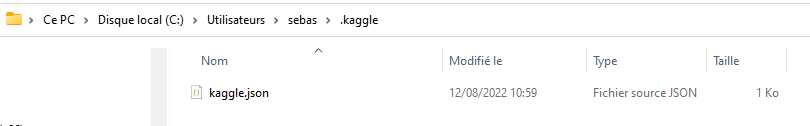

Cependant j'utilise un environnement ml1 particulier. Est-ce que cela peut-être lié?

In [478]:
echo %HOMEPATH%

\Users\sebas


# | Data Description

## | DataSet Description

**application_{train|test}.csv**

This is the main table, broken into two files for Train (with TARGET) and Test (without TARGET).
Static data for all applications. One row represents one loan in our data sample.

**bureau.csv**

All client's previous credits provided by other financial institutions that were reported to Credit Bureau (for clients who have a loan in our sample).
For every loan in our sample, there are as many rows as number of credits the client had in Credit Bureau before the application date.

**bureau_balance.csv**

Monthly balances of previous credits in Credit Bureau.
This table has one row for each month of history of every previous credit reported to Credit Bureau – i.e the table has (#loans in sample * # of relative previous credits * # of months where we have some history observable for the previous credits) rows.

**POS_CASH_balance.csv**

Monthly balance snapshots of previous POS (point of sales) and cash loans that the applicant had with Home Credit.
This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to loans in our sample – i.e. the table has (#loans in sample * # of relative previous credits * # of months in which we have some history observable for the previous credits) rows.

**credit_card_balance.csv**

Monthly balance snapshots of previous credit cards that the applicant has with Home Credit.
This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to loans in our sample – i.e. the table has (#loans in sample * # of relative previous credit cards * # of months where we have some history observable for the previous credit card) rows.

**previous_application.csv**

All previous applications for Home Credit loans of clients who have loans in our sample.
There is one row for each previous application related to loans in our data sample.

**installments_payments.csv**

Repayment history for the previously disbursed credits in Home Credit related to the loans in our sample.
There is a) one row for every payment that was made plus b) one row each for missed payment.
One row is equivalent to one payment of one installment OR one installment corresponding to one payment of one previous Home Credit credit related to loans in our sample.

**HomeCredit_columns_description.csv**

This file contains descriptions for the columns in the various data files.

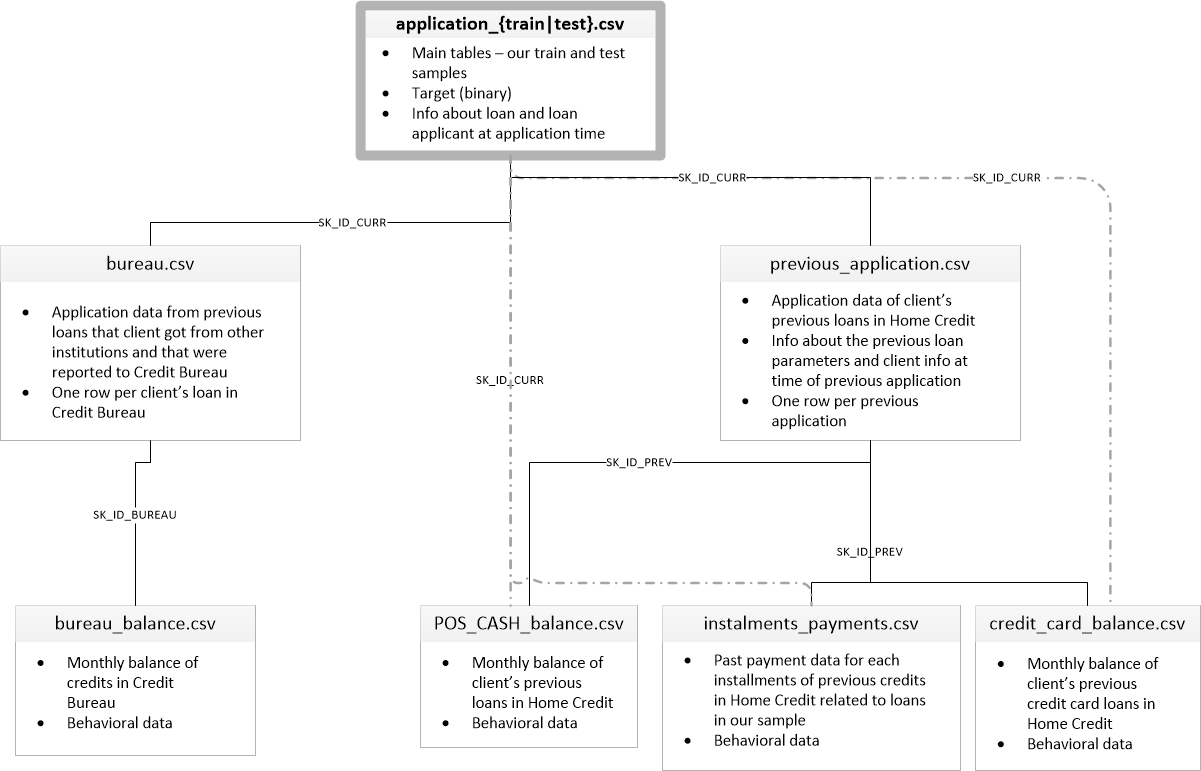

## | DataFrames Creation for EDA

In [479]:
# get current folder with os
# os.getcwd()

In [480]:
# Création des DataFrame
path = "D:\\FORMATION OPENCLASSROOMS\\2. PROJETS\\P7_DeRosa_Sebastien\\data\\"
train = pd.read_csv(path + "application_train.csv")
test = pd.read_csv(path + "application_test.csv")
bureau = pd.read_csv(path + "bureau.csv")
bureau_bal = pd.read_csv(path + "bureau_balance.csv")
pos_cash_bal = pd.read_csv(path + "POS_CASH_balance.csv")
cred_card_bal = pd.read_csv(path + "credit_card_balance.csv")
prev_app = pd.read_csv(path + "previous_application.csv")
install_pay = pd.read_csv(path + "installments_payments.csv")
col_descr = pd.read_csv(path + "HomeCredit_columns_description.csv", encoding_errors='ignore')

In [481]:
# Liste des DataFrame
list_df = ["train", "test", "bureau", "bureau_bal",
           "pos_cash_bal", "cred_card_bal", "prev_app", "install_pay", "col_descr"]

In [482]:
# path = "D:\\FORMATION OPENCLASSROOMS\\2. PROJETS\\P7_DeRosa_Sebastien\\data\\"
path = glob.glob('./data/*.csv')

In [483]:
#Data description
data_describe(path)

processing  ./data\application_test.csv :
processing  ./data\application_train.csv :
processing  ./data\bureau.csv :
processing  ./data\bureau_balance.csv :
processing  ./data\credit_card_balance.csv :
processing  ./data\HomeCredit_columns_description.csv :
processing  ./data\installments_payments.csv :
processing  ./data\POS_CASH_balance.csv :
processing  ./data\previous_application.csv :
processing  ./data\sample_submission.csv :
SUMMARY FILES…


,Rows,Columns,%NaN,%Duplicate,object_dtype,float_dtype,int_dtype,bool_dtype,MB_Memory
./data\application_test.csv,48744,121,23.81,0.0,16,65,40,0,44.998
./data\application_train.csv,307511,122,24.40,0.0,16,65,41,0,286.227
./data\bureau.csv,1716428,17,13.50,0.0,3,8,6,0,222.620
./data\bureau_balance.csv,27299925,3,0.00,0.0,1,0,2,0,624.846
./data\credit_card_balance.csv,3840312,23,6.65,0.0,1,15,7,0,673.883
./data\HomeCredit_columns_description.csv,219,4,15.18,0.0,4,0,0,0,0.008
./data\installments_payments.csv,13605401,8,0.01,0.0,0,5,3,0,830.408
./data\POS_CASH_balance.csv,10001358,8,0.07,0.0,1,2,5,0,610.435
./data\previous_application.csv,1670214,37,17.98,0.0,16,15,6,0,471.481
./data\sample_submission.csv,48744,2,0.00,0.0,0,1,1,0,0.744


In [484]:
pd.options.display.max_rows = 1000
pd.options.display.max_columns = 1000

In [485]:
#Data description
features(folder=glob.glob('./data/*.csv'))[0]

features   dtype       nan       count
./data\application_test.csv               0            NAME_CONTRACT_TYPE  object       0.0     48744.0
                                          1                   CODE_GENDER  object       0.0     48744.0
                                          2                  FLAG_OWN_CAR  object       0.0     48744.0
                                          3               FLAG_OWN_REALTY  object       0.0     48744.0
                                          4               NAME_TYPE_SUITE  object     911.0     47833.0
                                          5              NAME_INCOME_TYPE  object       0.0     48744.0
                                          6           NAME_EDUCATION_TYPE  object       0.0     48744.0
                                          7            NAME_FAMILY_STATUS  object       0.0     48744.0
                                          8             NAME_HOUSING_TYPE  object       0.0     48744.0
                                          9               OCCUPATION_TYPE  object   15605.0     33139.0
                                          10   WEEKDAY_APPR_PROCESS_START  object       0.0     48744.0
                                          11            ORGANIZATION_TYPE  object       0.0     48744.0
                                          12           FONDKAPREMONT_MODE  object   32797.0     15947.0
                                          13               HOUSETYPE_MODE  object   23619.0     25125.0
                                          14           WALLSMATERIAL_MODE  object   23893.0     24851.0
                                          15          EMERGENCYSTATE_MODE  object   22209.0     26535.0
./data\application_train.csv              0            NAME_CONTRACT_TYPE  object       0.0    307511.0
                                          1                   CODE_GENDER  object       0.0    307511.0
                                          2                  FLAG_OWN_CAR  object       0.0    307511.0
                                          3               FLAG_OWN_REALTY  object       0.0    307511.0
                                          4               NAME_TYPE_SUITE  object    1292.0    306219.0
                                          5              NAME_INCOME_TYPE  object       0.0    307511.0
                                          6           NAME_EDUCATION_TYPE  object       0.0    307511.0
                                          7            NAME_FAMILY_STATUS  object       0.0    307511.0
                                          8             NAME_HOUSING_TYPE  object       0.0    307511.0
                                          9               OCCUPATION_TYPE  object   96391.0    211120.0
                                          10   WEEKDAY_APPR_PROCESS_START  object       0.0    307511.0
                                          11            ORGANIZATION_TYPE  object       0.0    307511.0
                                          12           FONDKAPREMONT_MODE  object  210295.0     97216.0
                                          13               HOUSETYPE_MODE  object  154297.0    153214.0
                                          14           WALLSMATERIAL_MODE  object  156341.0    151170.0
                                          15          EMERGENCYSTATE_MODE  object  145755.0    161756.0
./data\bureau.csv                         0                 CREDIT_ACTIVE  object       0.0   1716428.0
                                          1               CREDIT_CURRENCY  object       0.0   1716428.0
                                          2                   CREDIT_TYPE  object       0.0   1716428.0
./data\bureau_balance.csv                 0                        STATUS  object       0.0  27299925.0
./data\credit_card_balance.csv            0          NAME_CONTRACT_STATUS  object       0.0   3840312.0
./data\HomeCredit_columns_description.csv 0                         Table  object       0.0       219.0
         

In [486]:
#Data description
features(folder=glob.glob('./data/*.csv'))[1]

features    dtype        nan       count       mean        std        min          max
./data\application_test.csv      0                      SK_ID_CURR    int64        0.0     48744.0   277796.0   103169.5   100001.0     456250.0
                                 1                    CNT_CHILDREN    int64        0.0     48744.0        0.0        0.7        0.0         20.0
                                 2                AMT_INCOME_TOTAL  float64        0.0     48744.0   178431.0   101522.6    26941.5    4410000.0
                                 3                      AMT_CREDIT  float64        0.0     48744.0   516740.0   365397.0    45000.0    2245500.0
                                 4                     AMT_ANNUITY  float64       24.0     48720.0    29426.0    16016.4     2295.0     180576.0
                                 5                 AMT_GOODS_PRICE  float64        0.0     48744.0   462618.0   336710.2    45000.0    2245500.0
                                 6      REGION_POPULATION_RELATIVE  float64        0.0     48744.0        0.0        0.0        0.0          0.1
                                 7                      DAYS_BIRTH    int64        0.0     48744.0   -16068.0     4325.9   -25195.0      -7338.0
                                 8                   DAYS_EMPLOYED    int64        0.0     48744.0    67485.0   144348.5   -17463.0     365243.0
                                 9               DAYS_REGISTRATION  float64        0.0     48744.0    -4967.0     3552.6   -23722.0          0.0
                                 10                DAYS_ID_PUBLISH    int64        0.0     48744.0    -3051.0     1569.3    -6348.0          0.0
                                 11                    OWN_CAR_AGE  float64    32312.0     16432.0       11.0       11.5        0.0         74.0
                                 12                     FLAG_MOBIL    int64        0.0     48744.0        0.0        0.0        0.0          1.0
                                 13                 FLAG_EMP_PHONE    int64        0.0     48744.0        0.0        0.4        0.0          1.0
                                 14                FLAG_WORK_PHONE    int64        0.0     48744.0        0.0        0.4        0.0          1.0
                                 15               FLAG_CONT_MOBILE    int64        0.0     48744.0        0.0        0.0        0.0          1.0
                                 16                     FLAG_PHONE    int64        0.0     48744.0        0.0        0.4        0.0          1.0
                                 17                     FLAG_EMAIL    int64        0.0     48744.0        0.0        0.4        0.0          1.0
                                 18                CNT_FAM_MEMBERS  float64        0.0     48744.0        2.0        0.9        1.0         21.0
                                 19           REGION_RATING_CLIENT    int64        0.0     48744.0        2.0        0.5        1.0          3.0
                                 20    REGION_RATING_CLIENT_W_CITY    int64        0.0     48744.0        2.0        0.5       -1.0          3.0
                                 21        HOUR_APPR_PROCESS_START    int64        0.0     48744.0       12.0        3.3        0.0         23.0
                                 22     REG_REGION_NOT_LIVE_REGION    int64        0.0     48744.0        0.0        0.1        0.0          1.0
                                 23     REG_REGION_NOT_WORK_REGION    int64        0.0     48744.0        0.0        0.2        0.0          1.0
                                 24    LIVE_REGION_NOT_WORK_REGION    int64        0.0     48744.0        0.0        0.2        0.0          1.0
                                 25         REG_CITY_NOT_LIVE_CITY    int64        0.0     48744.0        0.0        0.3        0.0          1.0
                                 26         REG_CITY_NOT_WORK_CITY    int64        0.0     48744.0        0.0        0.4        0.0          1.

In [487]:
pd.options.display.max_rows = 50
pd.options.display.max_columns = 50

# | Exploratory Data Analysis & Feature Engineering

## | Overview head / tail by DF

In [488]:
# for each dataframe show head and tail

for df in list_df:
    print("="*20)
    print((df), "| head |", "-"*20)
    display(eval(df).head())
    print((df), "| tail |", "-"*20)
    display(eval(df).tail())
    print("_"*20)

train | head | --------------------


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,...,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,NaN,1,1,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


train | tail | --------------------


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,...,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,0.032561,-9327,-236,-8456.0,-1982,NaN,1,1,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,0.025164,-20775,365243,-4388.0,-4090,NaN,1,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,585000.0,Unaccompanied,Working,Higher education,Separated,House / apartment,0.005002,-14966,-7921,-6737.0,-5150,NaN,1,1,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,319500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.005313,-11961,-4786,-2562.0,-931,NaN,1,1,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
307510,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,675000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.046220,-16856,-1262,-5128.0,-410,NaN,1,1,1,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,2.0,0.0,1.0


____________________
test | head | --------------------


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,...,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,-19241,-2329,-5170.0,-812,NaN,1,1,0,1,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-18064,-4469,-9118.0,-1623,NaN,1,1,0,1,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,Working,Higher education,Married,House / apartment,0.019101,-20038,-4458,-2175.0,-3503,5.0,1,1,0,1,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.026392,-13976,-1866,-2000.0,-4208,NaN,1,1,0,1,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.010032,-13040,-2191,-4000.0,-4262,16.0,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


test | tail | --------------------


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,...,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
48739,456221,Cash loans,F,N,Y,0,121500.0,412560.0,17473.5,270000.0,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,0.002042,-19970,-5169,-9094.0,-3399,NaN,1,1,1,1,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
48740,456222,Cash loans,F,N,N,2,157500.0,622413.0,31909.5,495000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.035792,-11186,-1149,-3015.0,-3003,NaN,1,1,0,1,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
48741,456223,Cash loans,F,Y,Y,1,202500.0,315000.0,33205.5,315000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.026392,-15922,-3037,-2681.0,-1504,4.0,1,1,0,1,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,3.0,1.0
48742,456224,Cash loans,M,N,N,0,225000.0,450000.0,25128.0,450000.0,Family,Commercial associate,Higher education,Married,House / apartment,0.018850,-13968,-2731,-1461.0,-1364,NaN,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
48743,456250,Cash loans,F,Y,N,0,135000.0,312768.0,24709.5,270000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.006629,-13962,-633,-1072.0,-4220,22.0,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0


____________________
bureau | head | --------------------


,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


bureau | tail | --------------------


,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
1716423,259355,5057750,Active,currency 1,-44,0,-30.0,NaN,0.0,0,11250.00,11250.0,0.0,0.0,Microloan,-19,NaN
1716424,100044,5057754,Closed,currency 1,-2648,0,-2433.0,-2493.0,5476.5,0,38130.84,0.0,0.0,0.0,Consumer credit,-2493,NaN
1716425,100044,5057762,Closed,currency 1,-1809,0,-1628.0,-970.0,NaN,0,15570.00,NaN,NaN,0.0,Consumer credit,-967,NaN
1716426,246829,5057770,Closed,currency 1,-1878,0,-1513.0,-1513.0,NaN,0,36000.00,0.0,0.0,0.0,Consumer credit,-1508,NaN
1716427,246829,5057778,Closed,currency 1,-463,0,NaN,-387.0,NaN,0,22500.00,0.0,NaN,0.0,Microloan,-387,NaN


____________________
bureau_bal | head | --------------------


,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


bureau_bal | tail | --------------------


,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
27299920,5041336,-47,X
27299921,5041336,-48,X
27299922,5041336,-49,X
27299923,5041336,-50,X
27299924,5041336,-51,X


____________________
pos_cash_bal | head | --------------------


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


pos_cash_bal | tail | --------------------


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
10001353,2448283,226558,-20,6.0,0.0,Active,843,0
10001354,1717234,141565,-19,12.0,0.0,Active,602,0
10001355,1283126,315695,-21,10.0,0.0,Active,609,0
10001356,1082516,450255,-22,12.0,0.0,Active,614,0
10001357,1259607,174278,-52,16.0,0.0,Completed,0,0


____________________
cred_card_bal | head | --------------------


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,1800.0,1800.0,0.000,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,2250.0,2250.0,60175.080,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,2250.0,2250.0,26926.425,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,11925.0,11925.0,224949.285,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,27000.0,27000.0,443044.395,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


cred_card_bal | tail | --------------------


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
3840307,1036507,328243,-9,0.000,45000,NaN,0.0,NaN,NaN,0.0,NaN,0.000,0.00,0.000,0.000,NaN,0,NaN,NaN,0.0,Active,0,0
3840308,1714892,347207,-9,0.000,45000,0.0,0.0,0.0,0.0,0.0,1879.11,0.000,0.00,0.000,0.000,0.0,0,0.0,0.0,23.0,Active,0,0
3840309,1302323,215757,-9,275784.975,585000,270000.0,270000.0,0.0,0.0,2250.0,375750.00,356994.675,269356.14,273093.975,273093.975,2.0,2,0.0,0.0,18.0,Active,0,0
3840310,1624872,430337,-10,0.000,450000,NaN,0.0,NaN,NaN,0.0,NaN,0.000,0.00,0.000,0.000,NaN,0,NaN,NaN,0.0,Active,0,0
3840311,2411345,236760,-10,0.000,157500,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.00,0.000,0.000,0.0,0,0.0,0.0,21.0,Completed,0,0


____________________
prev_app | head | --------------------


,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


prev_app | tail | --------------------


,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
1670209,2300464,352015,Consumer loans,14704.290,267295.5,311400.0,0.0,267295.5,WEDNESDAY,12,Y,1,0.000000,NaN,NaN,XAP,Approved,-544,Cash through the bank,XAP,NaN,Refreshed,Furniture,POS,XNA,Stone,43,Furniture,30.0,low_normal,POS industry with interest,365243.0,-508.0,362.0,-358.0,-351.0,0.0
1670210,2357031,334635,Consumer loans,6622.020,87750.0,64291.5,29250.0,87750.0,TUESDAY,15,Y,1,0.340554,NaN,NaN,XAP,Approved,-1694,Cash through the bank,XAP,Unaccompanied,New,Furniture,POS,XNA,Stone,43,Furniture,12.0,middle,POS industry with interest,365243.0,-1604.0,-1274.0,-1304.0,-1297.0,0.0
1670211,2659632,249544,Consumer loans,11520.855,105237.0,102523.5,10525.5,105237.0,MONDAY,12,Y,1,0.101401,NaN,NaN,XAP,Approved,-1488,Cash through the bank,XAP,"Spouse, partner",Repeater,Consumer Electronics,POS,XNA,Country-wide,1370,Consumer electronics,10.0,low_normal,POS household with interest,365243.0,-1457.0,-1187.0,-1187.0,-1181.0,0.0
1670212,2785582,400317,Cash loans,18821.520,180000.0,191880.0,NaN,180000.0,WEDNESDAY,9,Y,1,NaN,NaN,NaN,XNA,Approved,-1185,Cash through the bank,XAP,Family,Repeater,XNA,Cash,x-sell,AP+ (Cash loan),-1,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-1155.0,-825.0,-825.0,-817.0,1.0
1670213,2418762,261212,Cash loans,16431.300,360000.0,360000.0,NaN,360000.0,SUNDAY,10,Y,1,NaN,NaN,NaN,XNA,Approved,-1193,Cash through the bank,XAP,Family,Repeater,XNA,Cash,x-sell,AP+ (Cash loan),-1,XNA,48.0,middle,Cash X-Sell: middle,365243.0,-1163.0,247.0,-443.0,-423.0,0.0


____________________
install_pay | head | --------------------


,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


install_pay | tail | --------------------


,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
13605396,2186857,428057,0.0,66,-1624.0,NaN,67.500,NaN
13605397,1310347,414406,0.0,47,-1539.0,NaN,67.500,NaN
13605398,1308766,402199,0.0,43,-7.0,NaN,43737.435,NaN
13605399,1062206,409297,0.0,43,-1986.0,NaN,67.500,NaN
13605400,2448869,434321,1.0,19,-27.0,NaN,11504.250,NaN


____________________
col_descr | head | --------------------


,Table,Row,Description,Special
1,application_{train|test}.csv,SK_ID_CURR,ID of loan in our sample,NaN
2,application_{train|test}.csv,TARGET,"Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)",NaN
5,application_{train|test}.csv,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
6,application_{train|test}.csv,CODE_GENDER,Gender of the client,NaN
7,application_{train|test}.csv,FLAG_OWN_CAR,Flag if the client owns a car,NaN


col_descr | tail | --------------------


,Table,Row,Description,Special
217,installments_payments.csv,NUM_INSTALMENT_NUMBER,On which installment we observe payment,NaN
218,installments_payments.csv,DAYS_INSTALMENT,When the installment of previous credit was supposed to be paid (relative to application date of current loan),time only relative to the application
219,installments_payments.csv,DAYS_ENTRY_PAYMENT,When was the installments of previous credit paid actually (relative to application date of current loan),time only relative to the application
220,installments_payments.csv,AMT_INSTALMENT,What was the prescribed installment amount of previous credit on this installment,NaN
221,installments_payments.csv,AMT_PAYMENT,What the client actually paid on previous credit on this installment,NaN


____________________


## | Shape, missing and column names

In [489]:
# for each dataframe show shape, missing, and column names
for df in list_df:
    print((df), "-"*20)
    print("lignes x colonnes =", eval(df).shape)
    print("manquants(%) = ", eval(df).isnull().mean().mean())
    print(eval(df).columns)
    print("\n","="*20)

train --------------------
lignes x colonnes = (307511, 122)
manquants(%) =  0.24395941907129431
Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'], dtype='object', length=122)

test --------------------
lignes x colonnes = (48744, 121)
manquants(%) =  0.23811686761532333
Index(['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', '

In [490]:
print("test / train rate =", round(test.shape[0] / (train.shape[0] + test.shape[0]),2))

test / train rate = 0.14


## | Main Feature DataSet Creation (df)

In [491]:
path = "D:\\FORMATION OPENCLASSROOMS\\2. PROJETS\\P7_DeRosa_Sebastien\\data\\"

In [492]:
with timer("Full model run"):
    df = main()

Train samples: 307511, test samples: 48744
Bureau df shape: (305811, 116)
Process bureau and bureau_balance - done in 16s
Previous applications df shape: (338857, 249)
Process previous_applications - done in 14s
Pos-cash balance df shape: (337252, 18)
Process POS-CASH balance - done in 8s
Installments payments df shape: (339587, 26)
Process installments payments - done in 23s
Credit card balance df shape: (103558, 141)
Process credit card balance - done in 15s
Full model run - done in 80s


In [493]:
df

,index,SK_ID_CURR,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,...,CC_NAME_CONTRACT_STATUS_Demand_MAX,CC_NAME_CONTRACT_STATUS_Demand_MEAN,CC_NAME_CONTRACT_STATUS_Demand_SUM,CC_NAME_CONTRACT_STATUS_Demand_VAR,CC_NAME_CONTRACT_STATUS_Refused_MIN,CC_NAME_CONTRACT_STATUS_Refused_MAX,CC_NAME_CONTRACT_STATUS_Refused_MEAN,CC_NAME_CONTRACT_STATUS_Refused_SUM,CC_NAME_CONTRACT_STATUS_Refused_VAR,CC_NAME_CONTRACT_STATUS_Sent proposal_MIN,CC_NAME_CONTRACT_STATUS_Sent proposal_MAX,CC_NAME_CONTRACT_STATUS_Sent proposal_MEAN,CC_NAME_CONTRACT_STATUS_Sent proposal_SUM,CC_NAME_CONTRACT_STATUS_Sent proposal_VAR,CC_NAME_CONTRACT_STATUS_Signed_MIN,CC_NAME_CONTRACT_STATUS_Signed_MAX,CC_NAME_CONTRACT_STATUS_Signed_MEAN,CC_NAME_CONTRACT_STATUS_Signed_SUM,CC_NAME_CONTRACT_STATUS_Signed_VAR,CC_NAME_CONTRACT_STATUS_nan_MIN,CC_NAME_CONTRACT_STATUS_nan_MAX,CC_NAME_CONTRACT_STATUS_nan_MEAN,CC_NAME_CONTRACT_STATUS_nan_SUM,CC_NAME_CONTRACT_STATUS_nan_VAR,CC_COUNT
0,0,100002,1.0,0,0,0,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637.0,-3648.0,-2120,NaN,1,1,0,1,1,0,1.0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,100003,0.0,1,0,1,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188.0,-1186.0,-291,NaN,1,1,0,1,1,0,2.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,100004,0.0,0,1,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225.0,-4260.0,-2531,26.0,1,1,1,1,1,0,1.0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,100006,0.0,1,0,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039.0,-9833.0,-2437,NaN,1,1,0,1,0,0,2.0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
4,4,100007,0.0,0,0,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038.0,-4311.0,-3458,NaN,1,1,0,1,0,0,1.0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356250,48739,456221,NaN,1,0,0,0,121500.0,412560.0,17473.5,270000.0,0.002042,-19970,-5169.0,-9094.0,-3399,NaN,1,1,1,1,1,0,1.0,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
356251,48740,456222,NaN,1,0,1,2,157500.0,622413.0,31909.5,495000.0,0.035792,-11186,-1149.0,-3015.0,-3003,NaN,1,1,0,1,0,0,4.0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
356252,48741,456223,NaN,1,1,0,1,202500.0,315000.0,33205.5,315000.0,0.026392,-15922,-3037.0,-2681.0,-1504,4.0,1,1,0,1,1,0,3.0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
356253,48742,456224,NaN,0,0,1,0,225000.0,450000.0,25128.0,450000.0,0.018850,-13968,-2731.0,-1461.0,-1364,NaN,1,1,1,1,1,0,2.0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [494]:
df.shape

(356251, 798)

In [495]:
pd.options.display.max_rows = 1000
pd.options.display.max_columns = 1000

In [496]:
df.describe()

,index,SK_ID_CURR,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Unknown,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,ORGANIZATION_TYPE_Advertising,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business Entity Type 1,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZ

In [497]:
df.head()

,index,SK_ID_CURR,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Unknown,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,ORGANIZATION_TYPE_Advertising,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business Entity Type 1,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZ

In [498]:
df.columns.sort_values().to_list()

['ACTIVE_AMT_ANNUITY_MAX',
 'ACTIVE_AMT_ANNUITY_MEAN',
 'ACTIVE_AMT_CREDIT_MAX_OVERDUE_MEAN',
 'ACTIVE_AMT_CREDIT_SUM_DEBT_MAX',
 'ACTIVE_AMT_CREDIT_SUM_DEBT_MEAN',
 'ACTIVE_AMT_CREDIT_SUM_DEBT_SUM',
 'ACTIVE_AMT_CREDIT_SUM_LIMIT_MEAN',
 'ACTIVE_AMT_CREDIT_SUM_LIMIT_SUM',
 'ACTIVE_AMT_CREDIT_SUM_MAX',
 'ACTIVE_AMT_CREDIT_SUM_MEAN',
 'ACTIVE_AMT_CREDIT_SUM_OVERDUE_MEAN',
 'ACTIVE_AMT_CREDIT_SUM_SUM',
 'ACTIVE_CNT_CREDIT_PROLONG_SUM',
 'ACTIVE_CREDIT_DAY_OVERDUE_MAX',
 'ACTIVE_CREDIT_DAY_OVERDUE_MEAN',
 'ACTIVE_DAYS_CREDIT_ENDDATE_MAX',
 'ACTIVE_DAYS_CREDIT_ENDDATE_MEAN',
 'ACTIVE_DAYS_CREDIT_ENDDATE_MIN',
 'ACTIVE_DAYS_CREDIT_MAX',
 'ACTIVE_DAYS_CREDIT_MEAN',
 'ACTIVE_DAYS_CREDIT_MIN',
 'ACTIVE_DAYS_CREDIT_UPDATE_MEAN',
 'ACTIVE_DAYS_CREDIT_VAR',
 'ACTIVE_MONTHS_BALANCE_MAX_MAX',
 'ACTIVE_MONTHS_BALANCE_MIN_MIN',
 'ACTIVE_MONTHS_BALANCE_SIZE_MEAN',
 'ACTIVE_MONTHS_BALANCE_SIZE_SUM',
 'AMT_ANNUITY',
 'AMT_CREDIT',
 'AMT_GOODS_PRICE',
 'AMT_INCOME_TOTAL',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'A

In [499]:
pd.options.display.max_rows = 50
pd.options.display.max_columns = 50

## | Exploring train sample

### | General

In [500]:
#Number of each type of column
train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [501]:
#Number of unique classes in each object column
train.select_dtypes('object').nunique()

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

La plupart des variables catégorielles ont un nombre relativement petit d'entrées uniques. Nous devrons trouver un moyen de traiter ces variables catégorielles…

### | Missing values

En modélisation, des modèles tels que XGBoost peuvent gérer les valeurs manquantes sans imputation. Plusieurs alternatives seront possibles: remplacer les NaN, supprimer les colonnes avec un pourcentage élevé de valeurs manquantes (impossible de savoir à l'avance si ces colonnes seront utiles à notre modèle). Dans l'immédiat toutes les colonnes sont conservées…

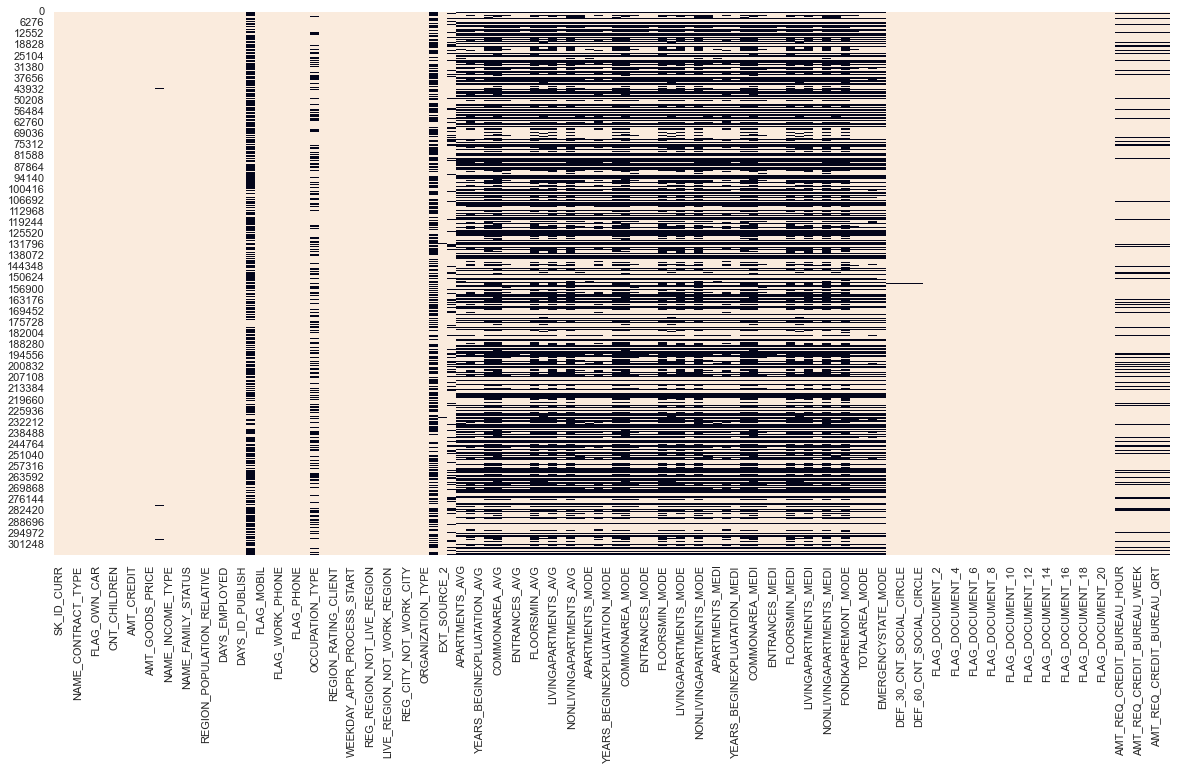

In [502]:
#Global view of the missing values (black)
plt.figure(figsize=(20,10))
sns.heatmap(train.notna(), cbar=False)
plt.show()

In [503]:
def nan_check(data):
    '''Check Missing Values'''
    total = data.isnull().sum()
    percent_1 = data.isnull().mean()*100
    percent_2 = (np.round(percent_1, 2))
    missing_data = pd.concat([total, percent_2], 
                             axis=1, keys=['Total', '%']).sort_values('%', ascending=False)
    return missing_data

In [504]:
print('TOP 10 Missing values from Training dataset')
nan_check(train)[:10]

TOP 10 Missing values from Training dataset


,Total,%
COMMONAREA_MEDI,214865,69.87
COMMONAREA_AVG,214865,69.87
COMMONAREA_MODE,214865,69.87
NONLIVINGAPARTMENTS_MODE,213514,69.43
NONLIVINGAPARTMENTS_AVG,213514,69.43
NONLIVINGAPARTMENTS_MEDI,213514,69.43
FONDKAPREMONT_MODE,210295,68.39
LIVINGAPARTMENTS_MODE,210199,68.35
LIVINGAPARTMENTS_AVG,210199,68.35
LIVINGAPARTMENTS_MEDI,210199,68.35


In [505]:
print("Nb of columns in the training sample: " + str(len(nan_check(train))))

print("Nb of columns in the training sample with missing values: " + 
      str(len(nan_check(train)[nan_check(train)['Total']!=0])))

Nb of columns in the training sample: 122
Nb of columns in the training sample with missing values: 67


In [506]:
print('TOP 10 Missing values from df dataset')
nan_check(df)[:10]

TOP 10 Missing values from df dataset


,Total,%
REFUSED_RATE_DOWN_PAYMENT_MAX,303648,85.23
REFUSED_RATE_DOWN_PAYMENT_MIN,303648,85.23
REFUSED_AMT_DOWN_PAYMENT_MEAN,303648,85.23
REFUSED_RATE_DOWN_PAYMENT_MEAN,303648,85.23
REFUSED_AMT_DOWN_PAYMENT_MAX,303648,85.23
REFUSED_AMT_DOWN_PAYMENT_MIN,303648,85.23
REFUSED_APP_CREDIT_PERC_VAR,298034,83.66
CC_AMT_PAYMENT_CURRENT_VAR,284649,79.90
CC_CNT_DRAWINGS_ATM_CURRENT_VAR,284559,79.88
CC_CNT_DRAWINGS_OTHER_CURRENT_VAR,284559,79.88


### | Fonctions pour faciliter l'analyse des principales variables…

In [507]:
def plot_stat(data, feature, title) : 
    
    ax, fig = plt.subplots(figsize=(20,8)) 
    ax = sns.countplot(y=feature, data=data, order=data[feature].value_counts(ascending=False).index)
    ax.set_title(title)

    for p in ax.patches:
                percentage = '{:.1f}%'.format(100 * p.get_width()/len(data[feature]))
                x = p.get_x() + p.get_width()
                y = p.get_y() + p.get_height()/2
                ax.annotate(percentage, (x, y), fontsize=20, fontweight='bold')

    plt.show()

In [508]:
def plot_percent_target1(data, feature, title) : 
    
    cat_perc = data[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)
    
    ax, fig = plt.subplots(figsize=(20,8)) 
    ax = sns.barplot(y=feature, x='TARGET', data=cat_perc)
    ax.set_title(title)
    ax.set_xlabel("")
    ax.set_ylabel("Percent of target with value 1")

    for p in ax.patches:
                percentage = '{:.1f}%'.format(100 * p.get_width())
                x = p.get_x() + p.get_width()
                y = p.get_y() + p.get_height()/2
                ax.annotate(percentage, (x, y), fontsize=20, fontweight='bold')

    plt.show()

### | Target 1 vs 0

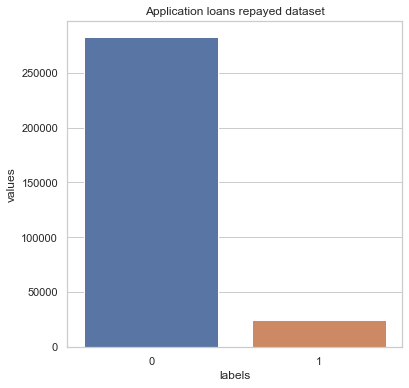

In [509]:
temp = train["TARGET"].value_counts()
df0 = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
plt.figure(figsize = (6,6))
plt.title('Application loans repayed dataset')
sns.set_color_codes("pastel")
sns.barplot(x = 'labels', y="values", data=df0)
plt.show()

### | Loan types

Let's see the type of the loans taken and also, on a separate plot, the percent of the loans (by type of the loan) with **TARGET** value 1 (not returned loan).

In [510]:
def plot_stats(feature,label_rotation=False,horizontal_layout=True):
    temp = train[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index,'Number of contracts': temp.values})

    # Calculate the percentage of target=1 per category value
    cat_perc = train[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)
    
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12,14))
    sns.set_color_codes("pastel")
    s = sns.barplot(ax=ax1, x = feature, y="Number of contracts",data=df1)
    
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
    s = sns.barplot(ax=ax2, x = feature, y='TARGET', order=cat_perc[feature], data=cat_perc)
    
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel('Percent of target with value 1 [%]', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)

    plt.show();

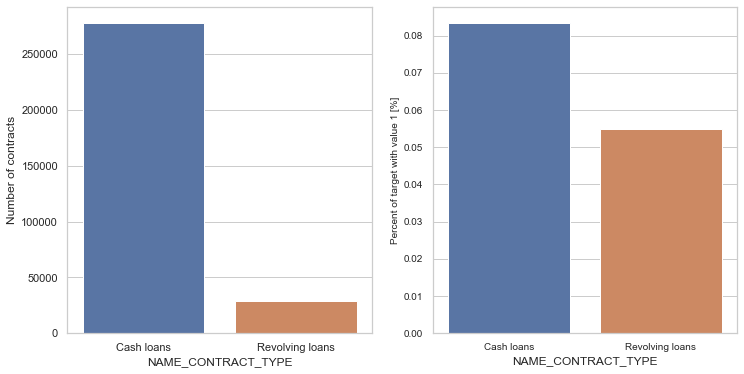

In [511]:
plot_stats('NAME_CONTRACT_TYPE')

Contract type Revolving loans are just a small fraction from the total number of loans; in the same time, a larger amount of Revolving loans, comparing with their frequency, are not repaid.

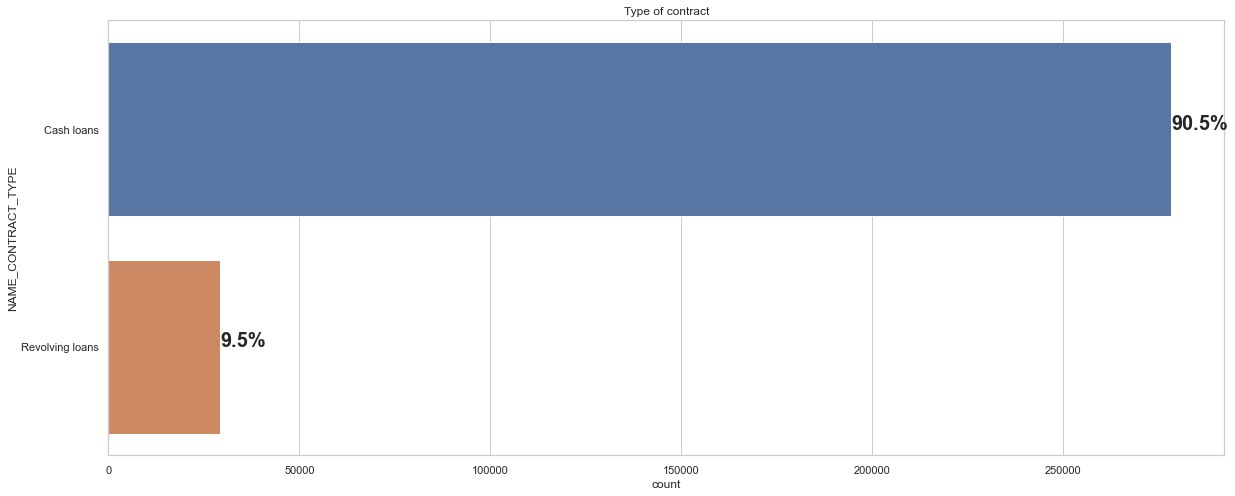

                                   -------------------------------------------------------


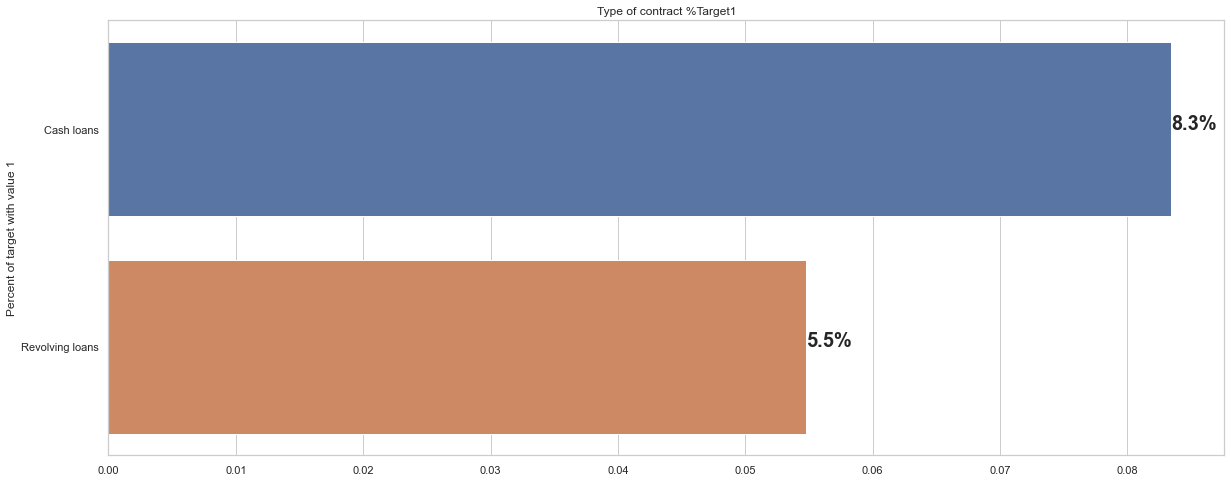

In [512]:
#NAME_CONTRACT_TYPE
plot_stat(train, 'NAME_CONTRACT_TYPE',"Type of contract")
print("                                   -------------------------------------------------------")
plot_percent_target1(train, 'NAME_CONTRACT_TYPE',"Type of contract %Target1")

### | Client gender

Let's see the gender of the clients and also, on a separate plot, the percent of the loans (by client gender) with **TARGET** value 1 (not returned loan).

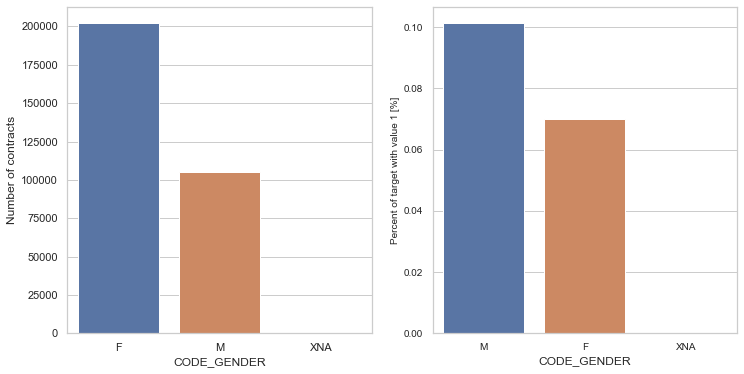

In [513]:
plot_stats('CODE_GENDER')

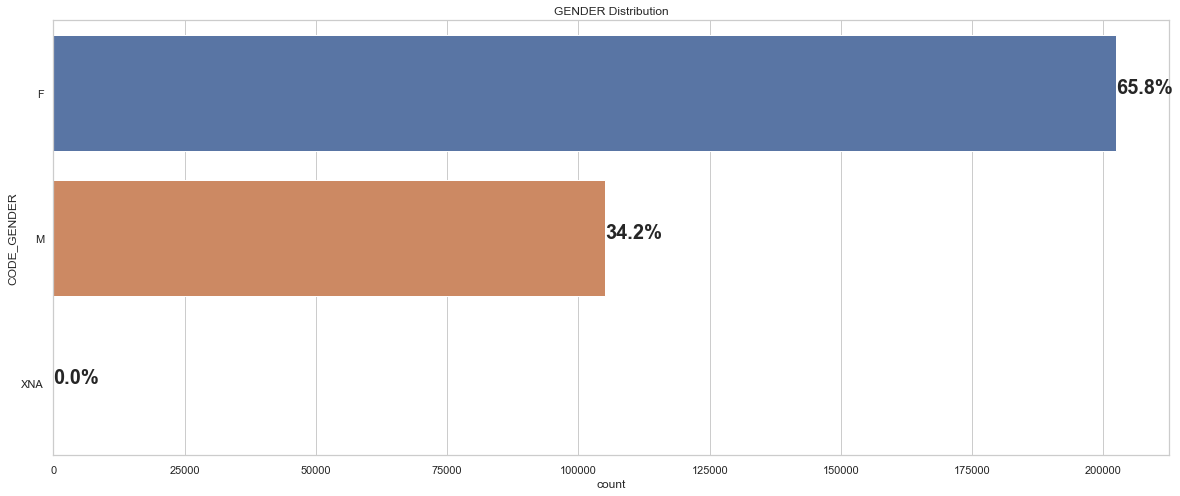

                                   -------------------------------------------------------


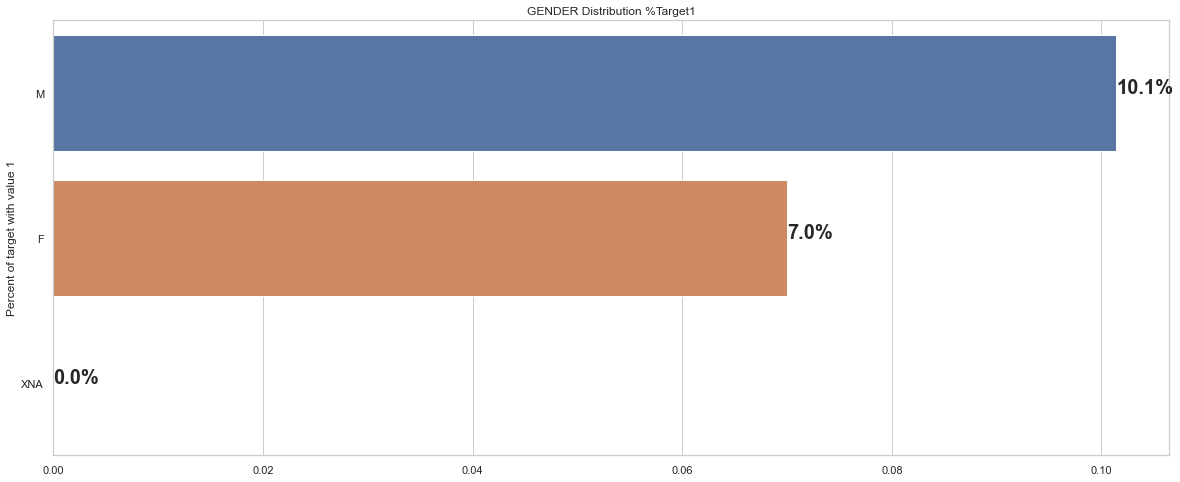

In [514]:
#CODE_GENDER
plot_stat(train, 'CODE_GENDER',"GENDER Distribution")
print("                                   -------------------------------------------------------")
plot_percent_target1(train, 'CODE_GENDER',"GENDER Distribution %Target1")

The number of female clients is almost double the number of male clients. Looking to the percent of defaulted credits, males have a higher chance of not returning their loans.

### | Flag own car and flag own real estate

Let's inspect the flags that tell us if a client owns a car or real estate and, on separate plots, the percent of the loans value of these flags) with **TARGET** value 1 (not returned loan).

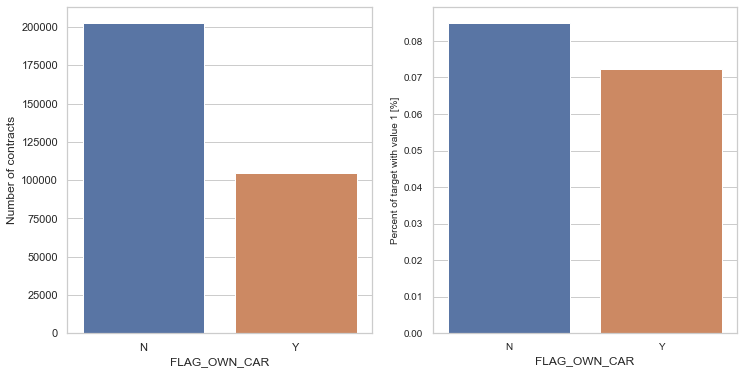

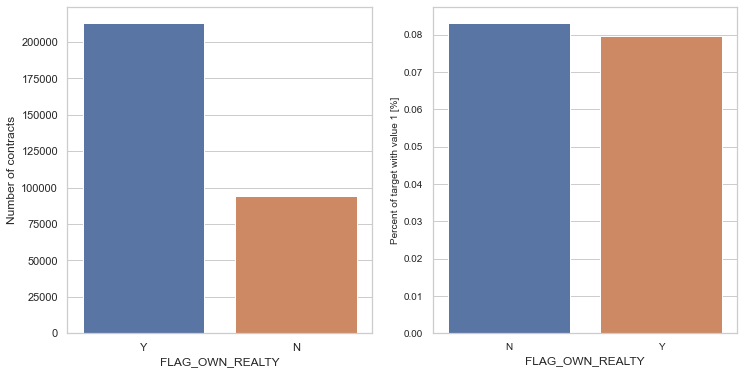

In [515]:
plot_stats('FLAG_OWN_CAR')
plot_stats('FLAG_OWN_REALTY')

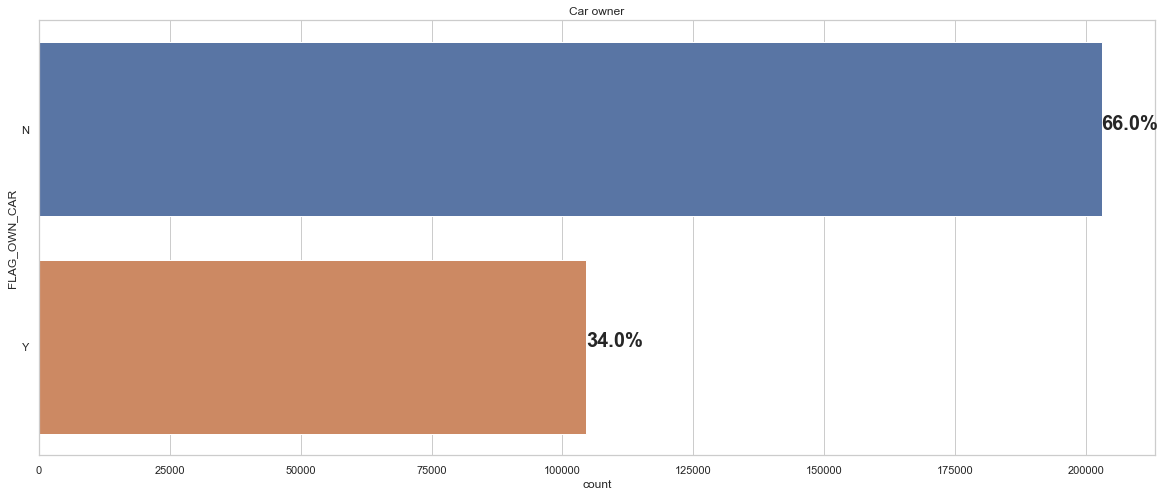

                                   -------------------------------------------------------


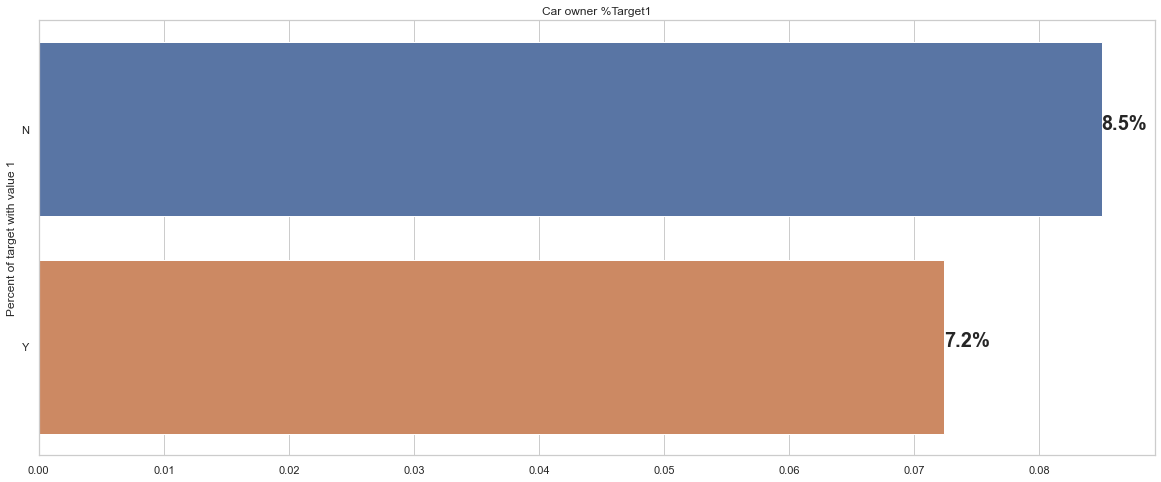

In [516]:

#FLAG_OWN_CAR
plot_stat(train, 'FLAG_OWN_CAR',"Car owner")
print("                                   -------------------------------------------------------")
plot_percent_target1(train, 'FLAG_OWN_CAR',"Car owner %Target1")

The clients that owns a car are almost a half of the ones that doesn't own one. Both categories have not-repayment rates around 8%.

The clients that owns real estate are more than double of the ones that doesn't own. Both categories (owning real estate or not owning) have not-repayment rates around 8%

### | **Client accompanied by**

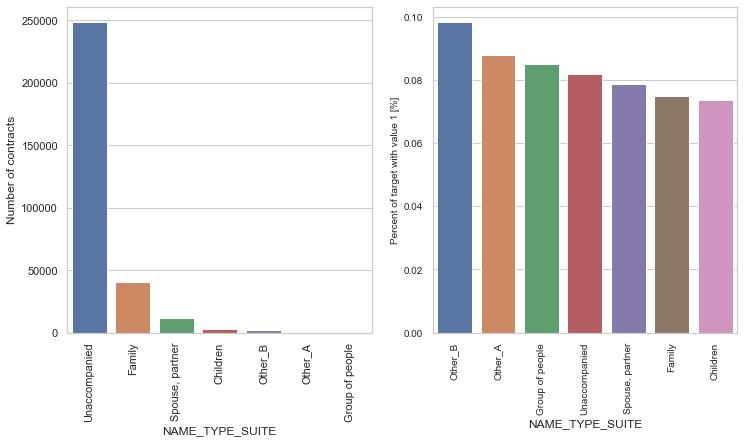

In [517]:
plot_stats('NAME_TYPE_SUITE',True, True)

Most of clients are unaccompanied while applying for the loan. In terms of percentage of not repayment of loan, clients accompanied by Other_B and Other_A are less likely to repay.

### | **Family status of client**

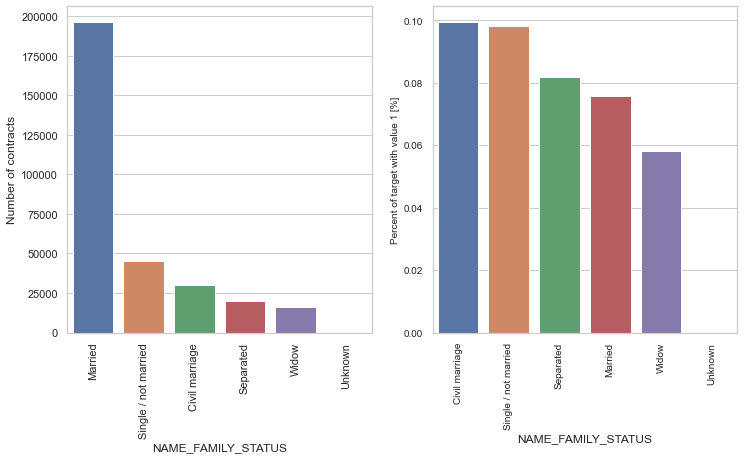

In [518]:
plot_stats('NAME_FAMILY_STATUS',True, True)

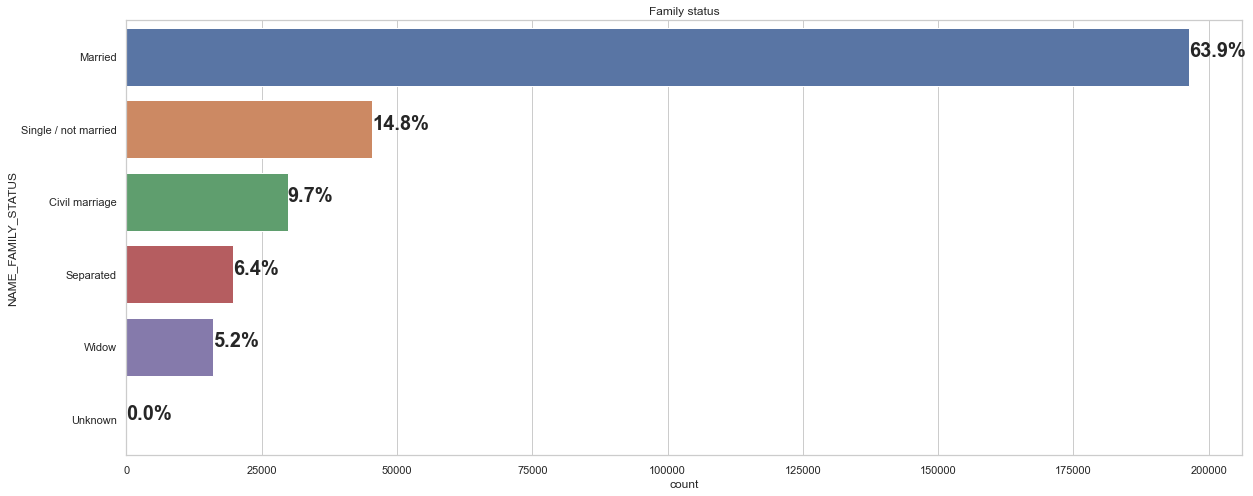

                                   -------------------------------------------------------


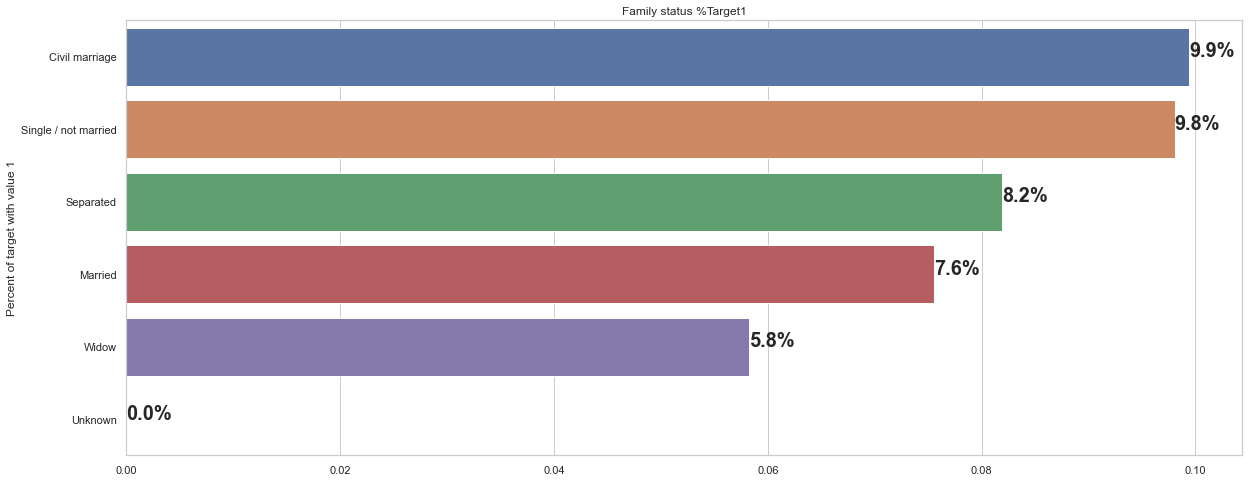

In [519]:

#NAME_FAMILY_STATUS
plot_stat(train, 'NAME_FAMILY_STATUS',"Family status")
print("                                   -------------------------------------------------------")
plot_percent_target1(train, 'NAME_FAMILY_STATUS',"Family status %Target1")

Most of clients are married, followed by Single/not married and civil marriage.

In terms of percentage of not repayment of loan, Civil marriage has the highest percent of not repayment (10%), with Widow the lowest (exception being Unknown).

### | Number of children

Let's see what is the distribution of the number of children of the clients.

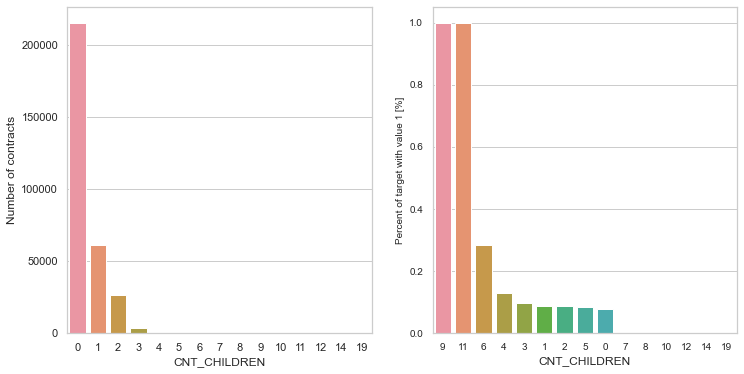

In [520]:
plot_stats('CNT_CHILDREN')

Most of the clients taking a loan have no children. The number of loans associated with the clients with one children are 4 times smaller, the number of loans associated with the clients with two children are 8 times smaller; clients with 3, 4 or more children are much more rare.

As for repayment, clients with no children, 1, 2, 3, and 5 children have percent of no repayment around the average (10%). The clients with 4 and 6 children are above average in terms of percent of not paid back loans (over 25% for families with 6 children).

As for clients with 9 or 11 children, the percent of loans not repaid is 100%.

### | **Number of family members of client**

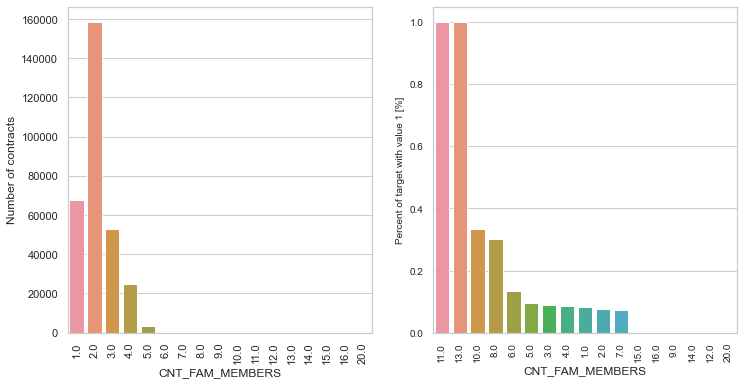

In [521]:
plot_stats('CNT_FAM_MEMBERS',True)

Clients with family members of 2 are most numerous, followed by 1 (single persons), 3 (families with one child) and 4.

Clients with family size of 11 and 13 have 100% not repayment rate. Other families with 10 or 8 members have percent of not repayment of loans over 30%. Families with 6 or less members have repayment rates close to the 10% average.

### | Income type of client

Let's investigate the numbers of clients with different income type. As well, let's see the percent of not returned loans per income type of applicants.

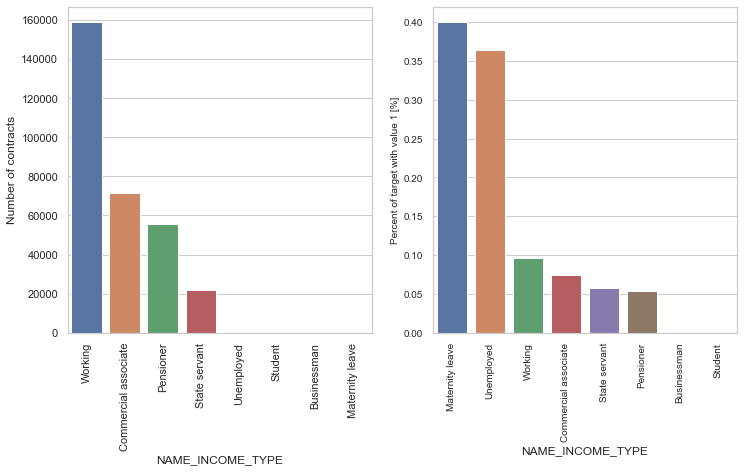

In [522]:
plot_stats('NAME_INCOME_TYPE',True,True)

Most of applicants for loans are income from Working, followed by Commercial associate, Pensioner and State servant.

The applicants with the type of income Maternity leave have almost 40% ratio of not returning loans, followed by Unemployed (37%). The rest of types of incomes are under the average of 10% for not returning loans.

### | Occupation of client

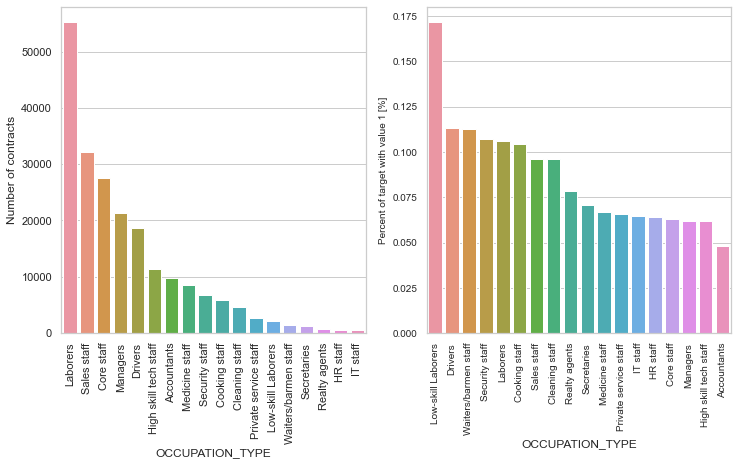

In [523]:
plot_stats('OCCUPATION_TYPE',True, True)

Most of the loans are taken by Laborers, followed by Sales staff. IT staff take the lowest amount of loans.

The category with highest percent of not repaid loans are Low-skill Laborers (above 17%), followed by Drivers and Waiters/barmen staff, Security staff, Laborers and Cooking staff.

### | Organization type

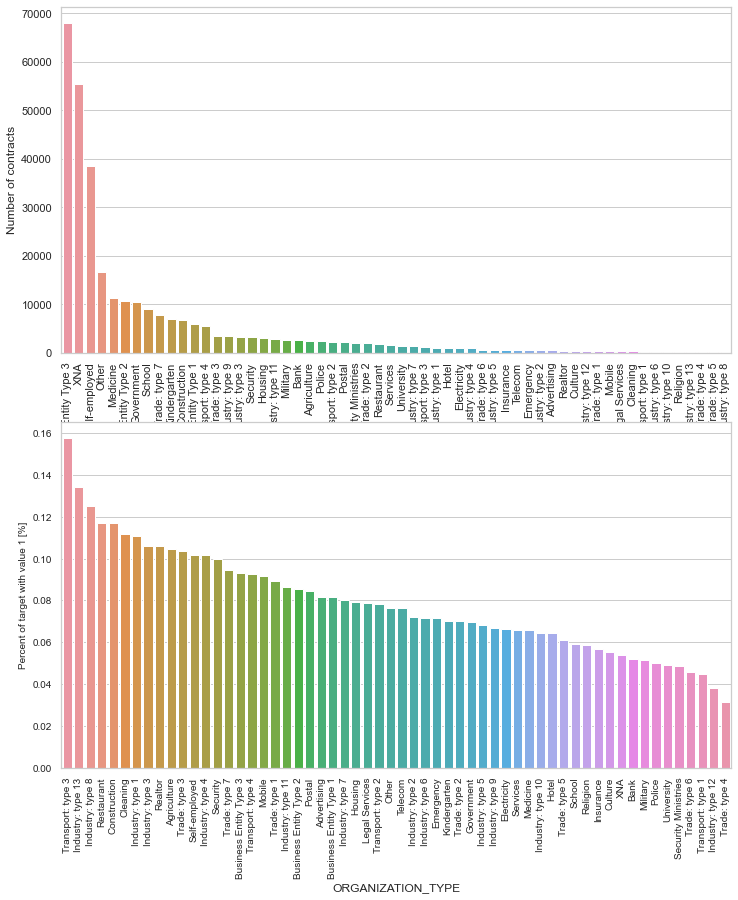

In [524]:
plot_stats('ORGANIZATION_TYPE',True, False)

Organizations with highest percent of loans not repaid are Transport: type 3 (16%), Industry: type 13 (13.5%), Industry: type 8 (12.5%) and Restaurant (less than 12%)

### | Education type of the client

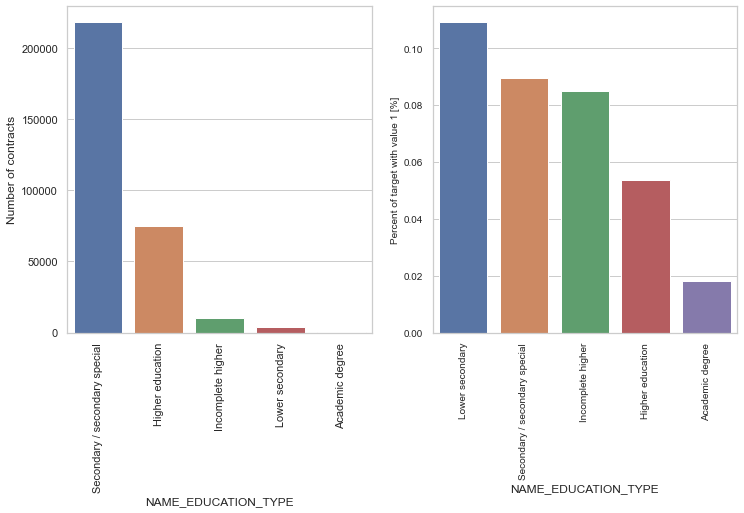

In [525]:
plot_stats('NAME_EDUCATION_TYPE',True)

Majority of the clients have Secondary / secondary special education, followed by clients with Higher education. Only a very small number having an academic degree.

The Lower secondary category, although rare, have the largest rate of not returning the loan (11%). The people with Academic degree have less than 2% not-repayment rate.

### | Type of the housing of client

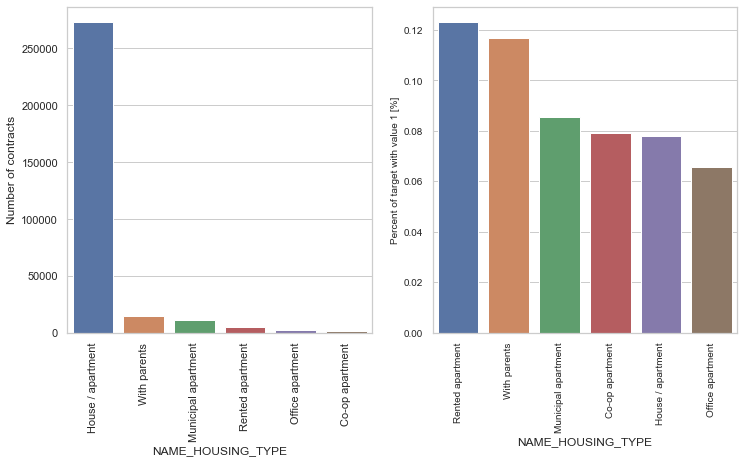

In [526]:
plot_stats('NAME_HOUSING_TYPE',True)

Over 250,000 applicants for credits registered their housing as House/apartment. Following categories have a very small number of clients (With parents, Municipal appartment).

From these categories, Rented apartment and With parents have higher than 10% not-repayment rate.

### | Total income distribution

Let's plot the distribution of total income for the clients.

In [527]:
# Plot distribution of one feature
def plot_distribution(feature,color):
    plt.figure(figsize=(10,6))
    plt.title("Distribution of %s" % feature)
    sns.distplot(train[feature].dropna(),color=color, kde=True,bins=100)
    plt.show()   

In [528]:
# Plot distribution of multiple features, with TARGET = 1/0 on the same graph
def plot_distribution_comp(var,nrow=2):
    
    i = 0
    t1 = train.loc[train['TARGET'] != 0]
    t0 = train.loc[train['TARGET'] == 0]

    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(nrow,2,figsize=(12,6*nrow))

    for feature in var:
        i += 1
        plt.subplot(nrow,2,i)
        sns.kdeplot(t1[feature], bw=0.5,label="TARGET = 1")
        sns.kdeplot(t0[feature], bw=0.5,label="TARGET = 0")
        plt.ylabel('Density plot', fontsize=12)
        plt.xlabel(feature, fontsize=12)
        locs, labels = plt.xticks()
        plt.tick_params(axis='both', which='major', labelsize=12)
        plt.legend(loc='best')
    plt.show();

In [529]:
train['AMT_INCOME_TOTAL'].min(),train['AMT_INCOME_TOTAL'].max()

(25650.0, 117000000.0)

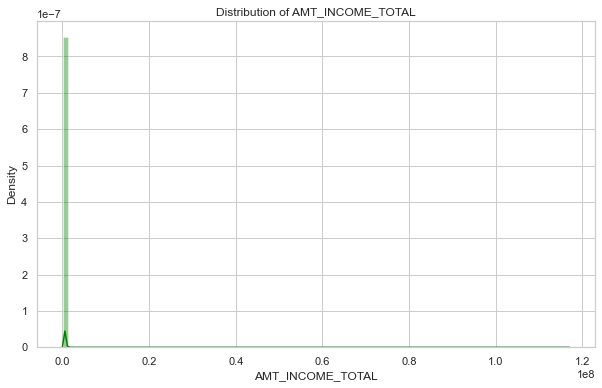

In [530]:
plot_distribution('AMT_INCOME_TOTAL','green')

The income values are very high for certail obervation so why the graph appers like this. As we are doing anomaly detection we won't be removing them.

### | Credit distribution

Let's plot the credit distribution.

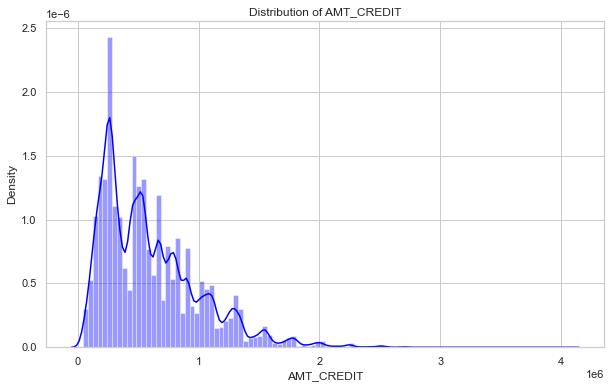

In [531]:
plot_distribution('AMT_CREDIT','blue')

In [532]:
#Plot distribution of one feature
def plot_distribution(feature, title):
    plt.figure(figsize=(20,6))

    t0 = train.loc[train['TARGET'] == 0]
    t1 = train.loc[train['TARGET'] == 1]

    
    sns.kdeplot(t0[feature].dropna(), color='blue', label="TARGET = 0")
    sns.kdeplot(t1[feature].dropna(), color='red', label="TARGET = 1")
    plt.title(title)
    plt.ylabel('')
    plt.legend()
    plt.show()   

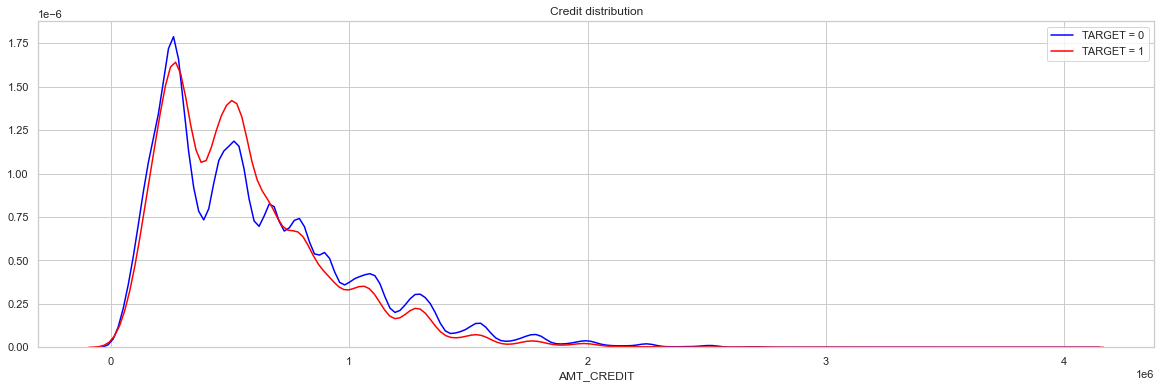

                                   -------------------------------------------------------


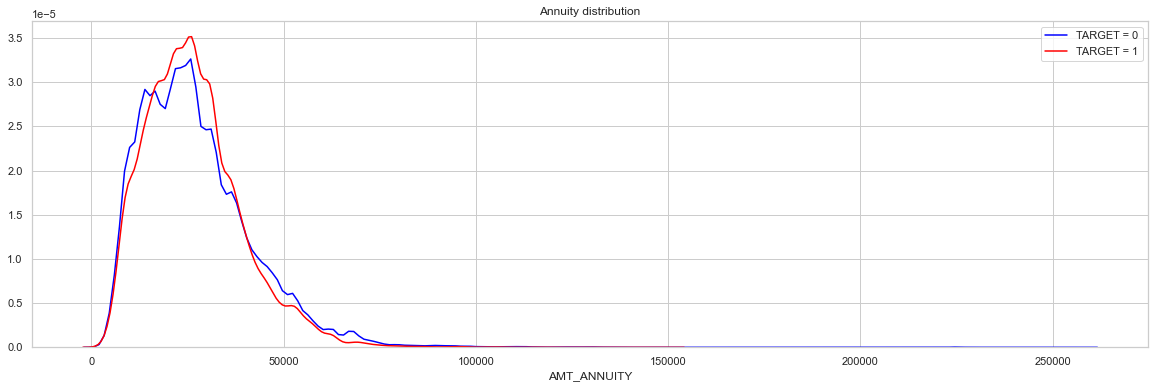

                                   -------------------------------------------------------


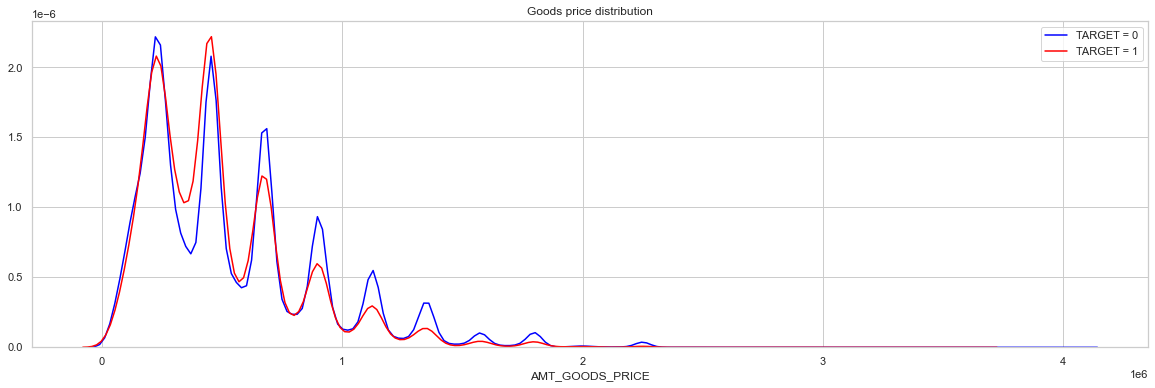

                                   -------------------------------------------------------


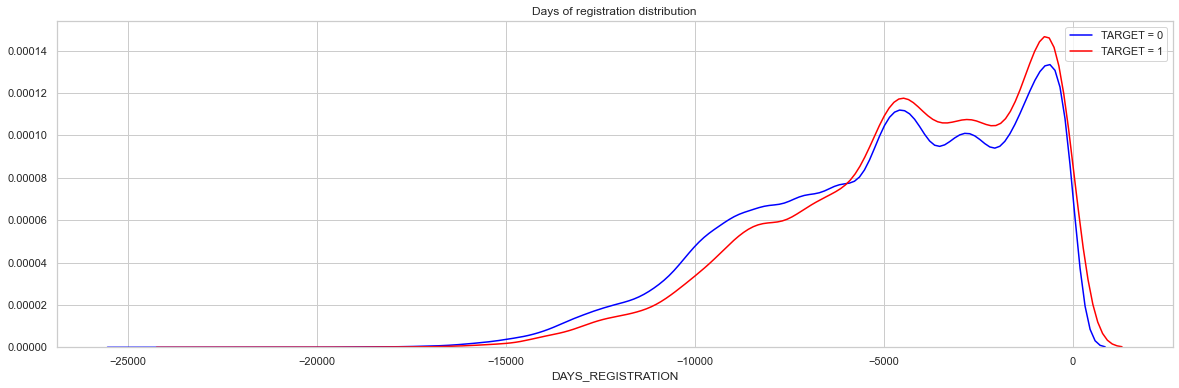

                                   -------------------------------------------------------


In [533]:
plot_distribution('AMT_CREDIT', "Credit distribution")
print("                                   -------------------------------------------------------")
plot_distribution('AMT_ANNUITY', "Annuity distribution")
print("                                   -------------------------------------------------------")
plot_distribution('AMT_GOODS_PRICE', "Goods price distribution")
print("                                   -------------------------------------------------------")
plot_distribution('DAYS_REGISTRATION', "Days of registration distribution")
print("                                   -------------------------------------------------------")

### | Annuity distribution

Let's plot the annuity distribution.

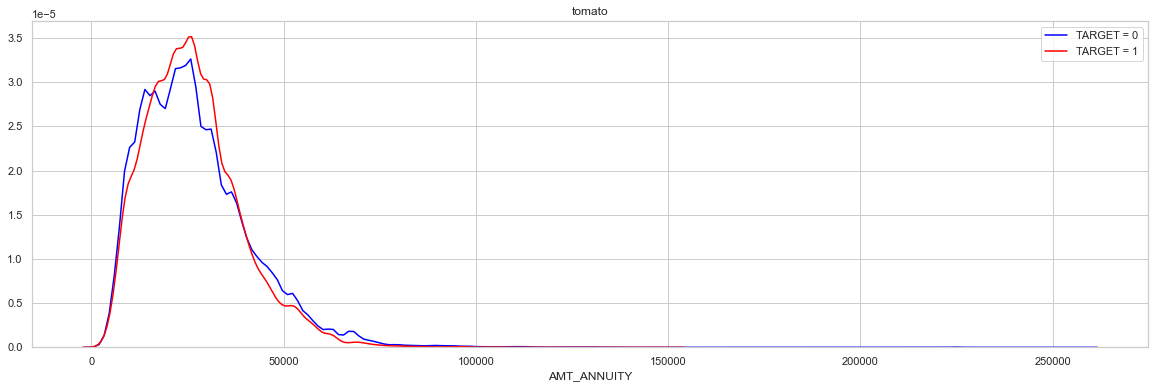

In [534]:
plot_distribution('AMT_ANNUITY','tomato')

### | Goods price

Let's plot the good price distribution.

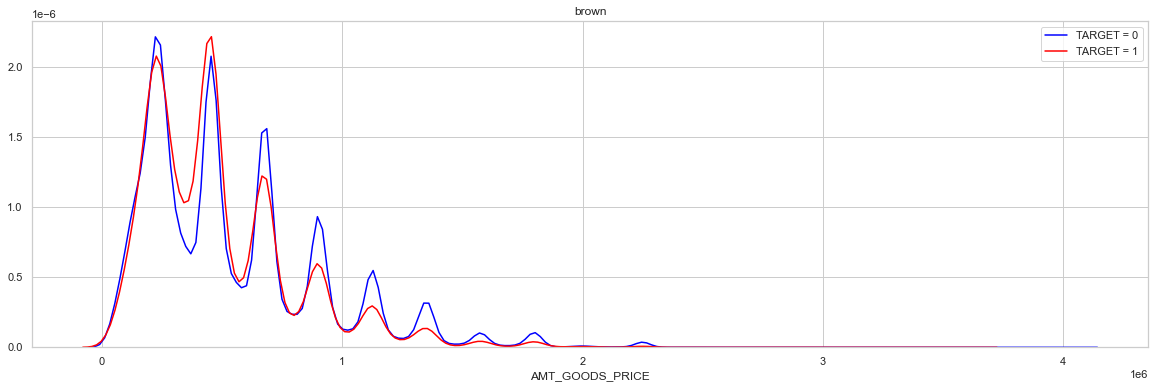

In [535]:
plot_distribution('AMT_GOODS_PRICE','brown')

### | Days from birth distribution

Let's plot the distribution number of days from birth.

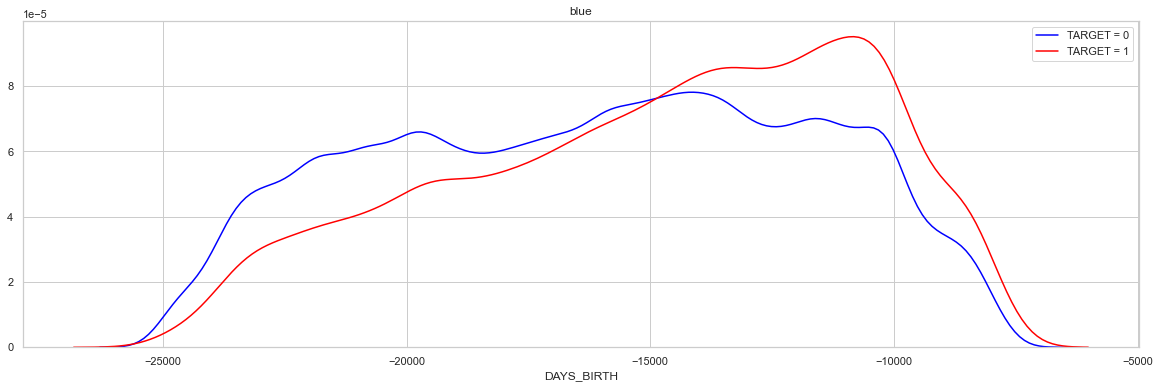

In [536]:
plot_distribution('DAYS_BIRTH','blue')

The negative value means that the date of birth is in the past. The age range is between approximative 20 and 68 years.<br>
Lets dig more on age

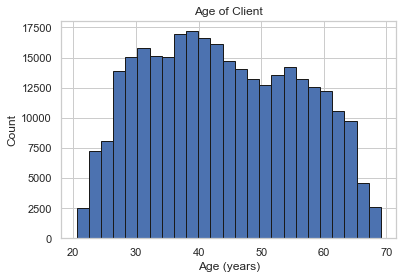

In [537]:
train['DAYS_BIRTH'] = abs(train['DAYS_BIRTH'])

# Plot the distribution of ages in years
plt.hist(train['DAYS_BIRTH'] / 365, edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');

There are no outliers as all the ages are reasonable. lets visualize the effect of the age on the target, we will next make a kernel density estimation plot (KDE) colored by the value of the target.

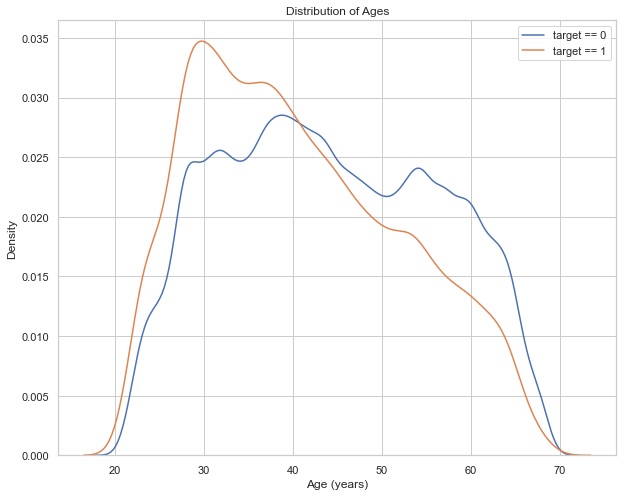

In [538]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(train.loc[train['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(train.loc[train['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label = 'target == 1')

# Labeling of plot
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages')
plt.legend(loc='upper right')

The target == 1 curve skews towards the younger end of the range. Although this is not a significant correlation (-0.07 correlation coefficient), this variable is likely going to be useful in a machine learning model because it does affect the target.

Thus, There is a clear trend: younger applicants are more likely to not repay the loan! This is information that could be directly used by the bank: because younger clients are less likely to repay the loan, maybe they should be provided with more guidance or financial planning tips. This does not mean the bank should discriminate against younger clients, but it would be smart to take precautionary measures to help younger clients pay on time.

### | Days employed distribution

Let's represent the distribution of number of days employed

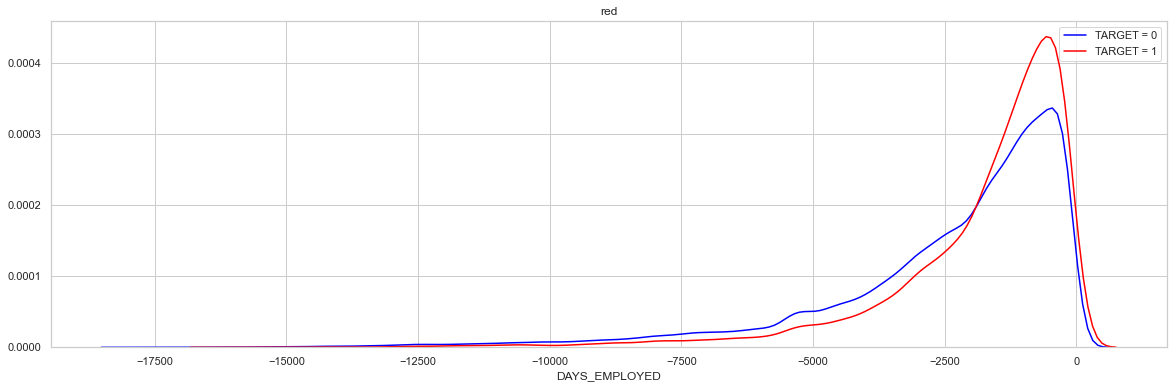

In [539]:
# Replace the anomalous values with nan
train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

plot_distribution('DAYS_EMPLOYED','red')

### | Days of registration distribution

Let's plot the distribution of DAYS_REGISTRATION.

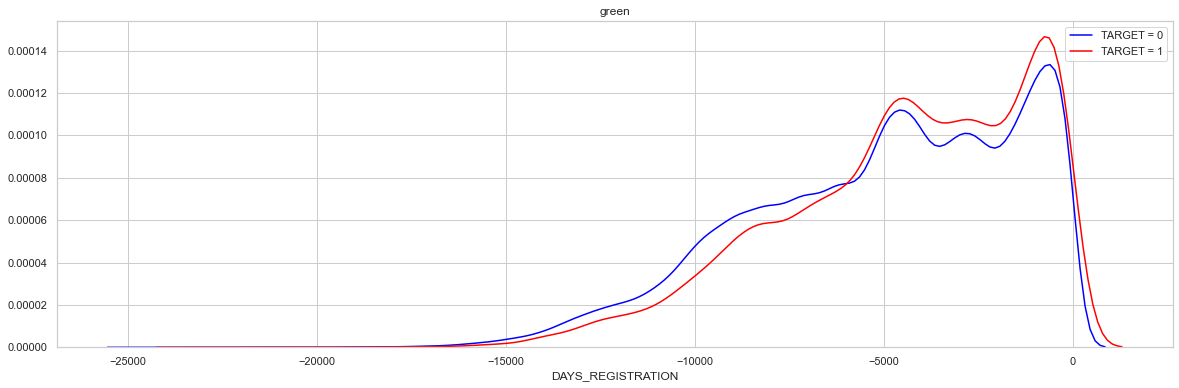

In [540]:
plot_distribution('DAYS_REGISTRATION','green')

### | Days ID publish distribution

Let's plot the distribution of DAYS_ID_PUBLISH.

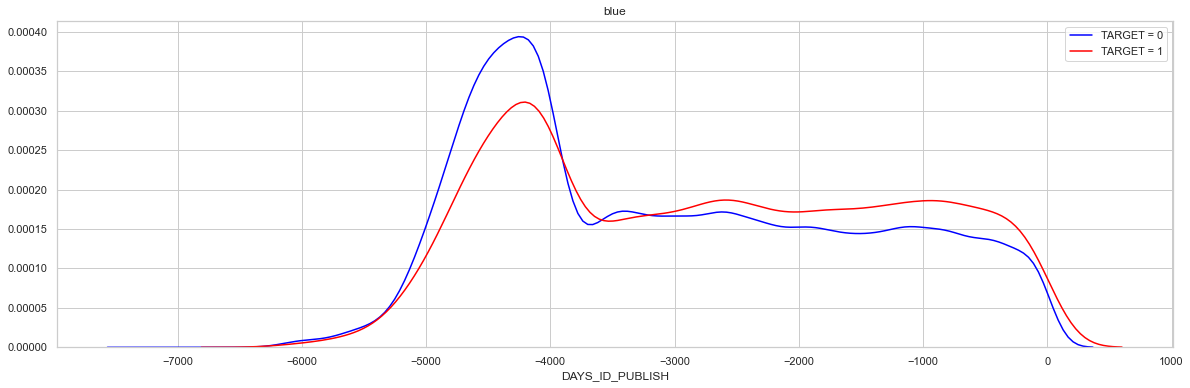

In [541]:
plot_distribution('DAYS_ID_PUBLISH','blue')

### | Comparison of interval values with TARGET = 1 and TARGET = 0

Let's compare the distribution of interval values ploted above for values of TARGET = 1 and TARGET = 0

<Figure size 432x288 with 0 Axes>

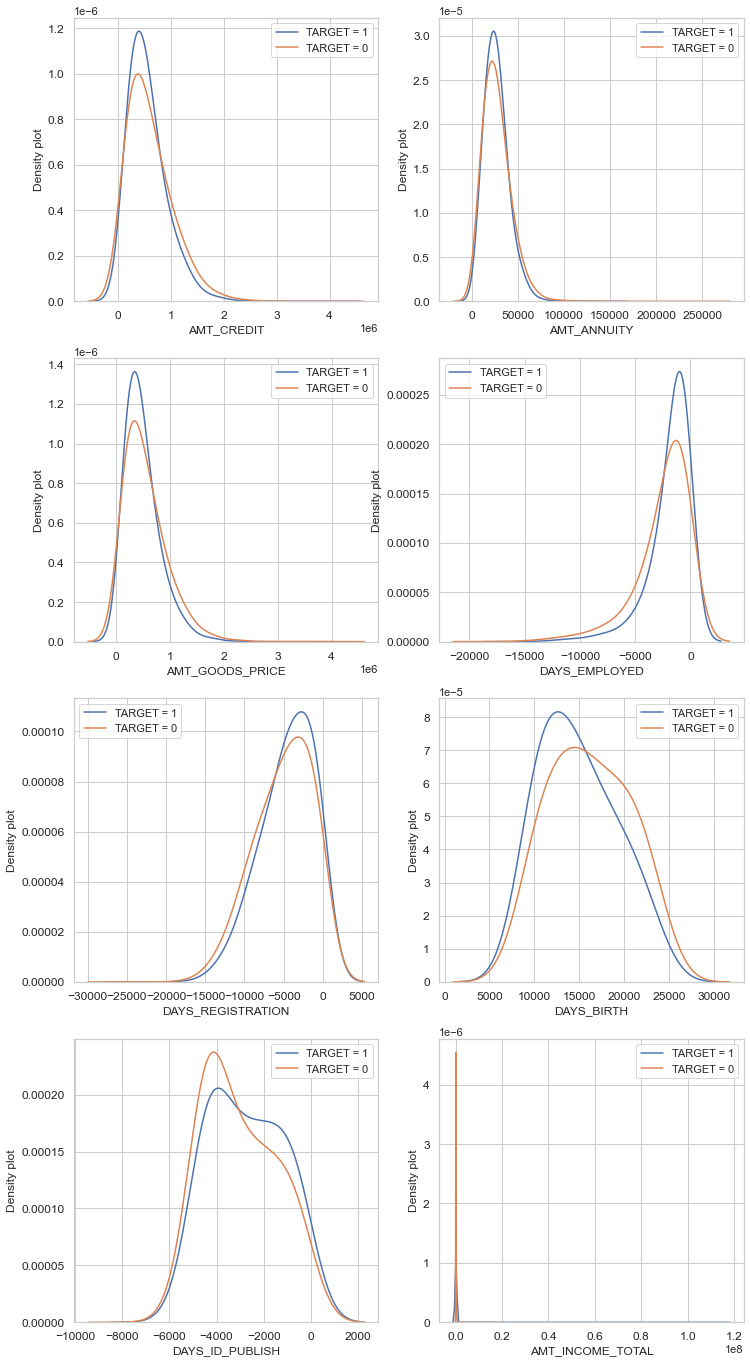

In [542]:
var = ['AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','DAYS_EMPLOYED', 'DAYS_REGISTRATION','DAYS_BIRTH','DAYS_ID_PUBLISH','AMT_INCOME_TOTAL']
plot_distribution_comp(var,nrow=4)

### | Region registered not live region and not work region

Let's represent the values of region registered and not live region and region registered and not work region.

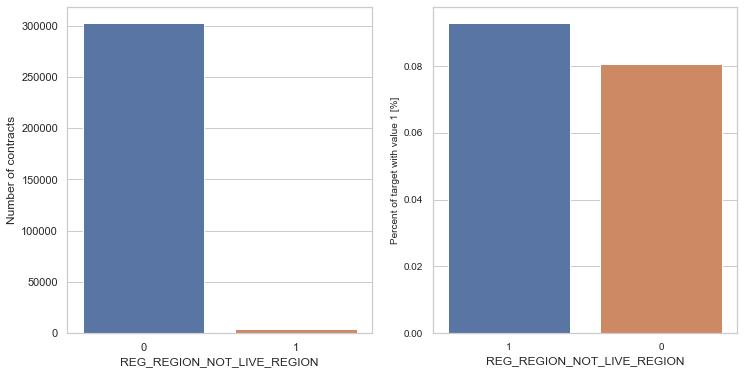

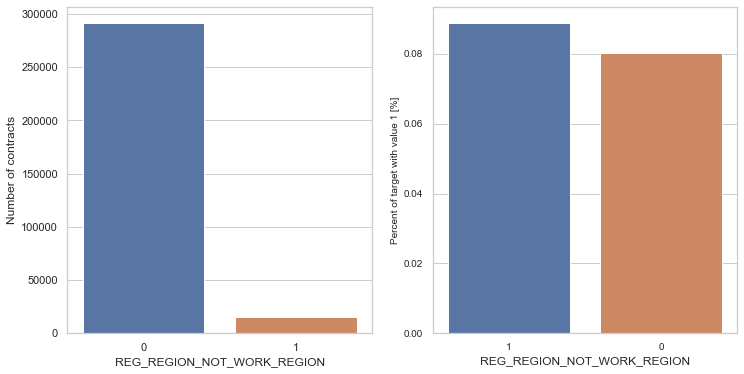

In [543]:
plot_stats('REG_REGION_NOT_LIVE_REGION')
plot_stats('REG_REGION_NOT_WORK_REGION')

Very few people are registered in not live or not work region. Generally, the rate of not return is slightly larger for these cases than in the rest (slightly above 8% compared with approx. 8%)

### | City registered not live city and not work city

Let's represent the values of City registered not live city and not work city.

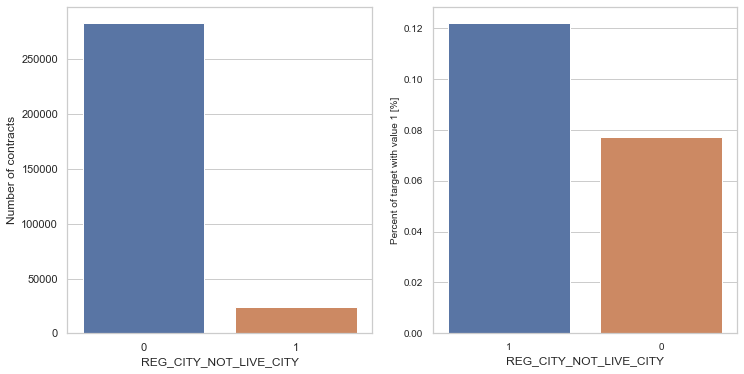

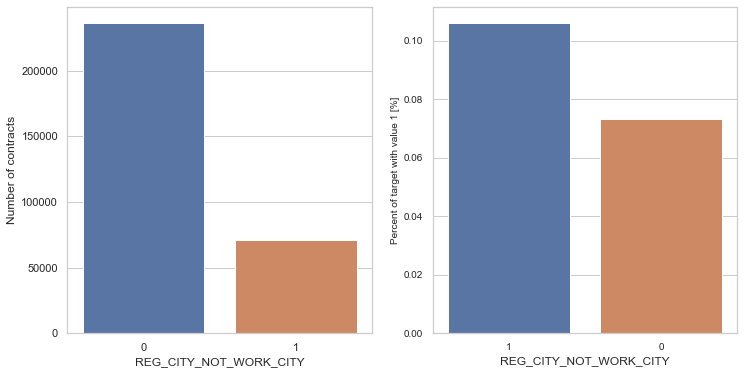

In [544]:
plot_stats('REG_CITY_NOT_LIVE_CITY')
plot_stats('REG_CITY_NOT_WORK_CITY')

Generally, much more people register in the city they live or work (a larger number register differently in the working city than living city).

The ones that register in different city than the working or living city are more frequently not-repaying the loans than the ones that register same city (work 11% or live 12%).

### | Exterior Sources

The 3 variables with the strongest negative correlations with the target are EXT_SOURCE_1, EXT_SOURCE_2, and EXT_SOURCE_3. According to the documentation, these features represent a "normalized score from external data source". I'm not sure what this exactly means, it might be a commercial database with other algorithm results.

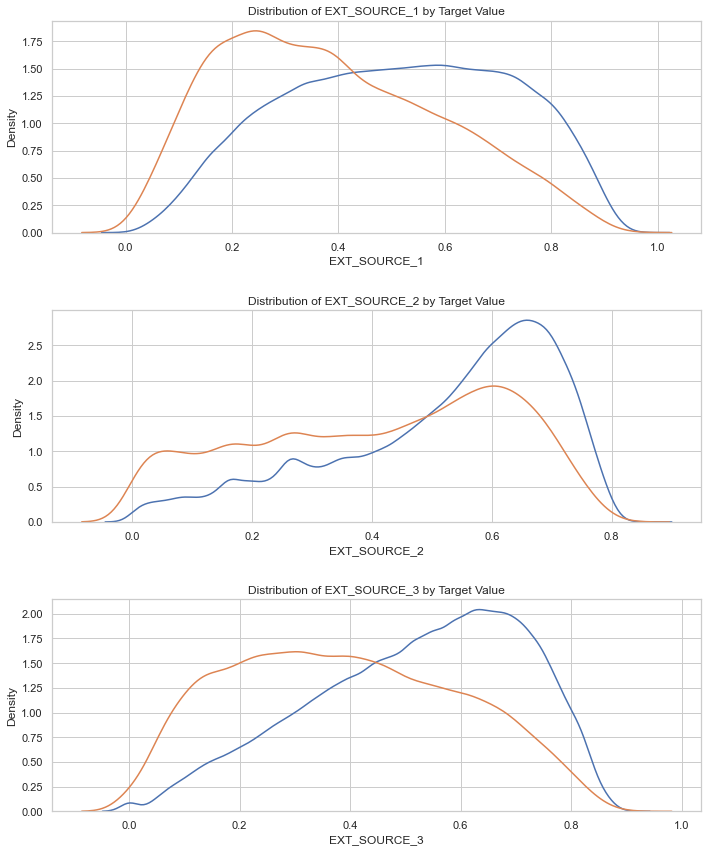

In [545]:
plt.figure(figsize = (10, 12))

# iterate through the sources
for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):
    
    # create a new subplot for each source
    plt.subplot(3, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(train.loc[train['TARGET'] == 0, source], label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(train.loc[train['TARGET'] == 1, source], label = 'target == 1')
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % source)
    plt.xlabel('%s' % source); plt.ylabel('Density');
    
plt.tight_layout(h_pad = 2.5)

EXT_SOURCE_3 displays the greatest difference between the values of the target. We can clearly see that this feature has some relationship to the likelihood of an applicant to repay a loan.

Lets also see correlations of the EXT_SOURCE features with the target and with each other.

In [546]:
# Extract the EXT_SOURCE variables and show correlations
ext_data = train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
TARGET,1.000000,-0.155317,-0.160472,-0.178919
EXT_SOURCE_1,-0.155317,1.000000,0.213982,0.186846
EXT_SOURCE_2,-0.160472,0.213982,1.000000,0.109167
EXT_SOURCE_3,-0.178919,0.186846,0.109167,1.000000


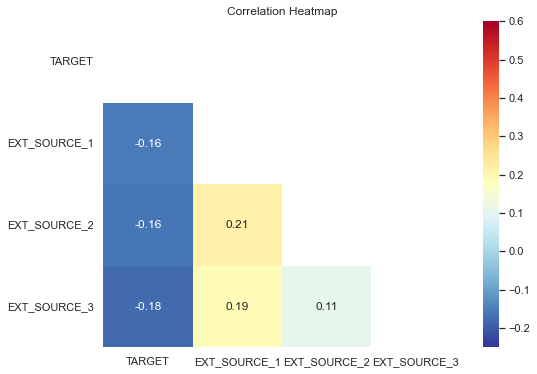

In [547]:
plt.figure(figsize = (8, 6))

# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(ext_data_corrs)

# Heatmap of correlations, using the upper triangle matrix as mask
sns.heatmap(ext_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6, mask=matrix)
plt.title('Correlation Heatmap');

All three EXT_SOURCE featureshave negative correlations with the target, indicating that as the value of the EXT_SOURCE increases, the client is more likely to repay the loan.

### | Correlations

In [548]:
correlations = train.corr()['TARGET'].sort_values()

# Display correlations
print('Most Positive Correlations:\n',correlations.tail(20))
print('\nMost Negative Correlations:\n',correlations.head(20))

Most Positive Correlations:
 OBS_30_CNT_SOCIAL_CIRCLE       0.009131
CNT_FAM_MEMBERS                0.009308
CNT_CHILDREN                   0.019187
AMT_REQ_CREDIT_BUREAU_YEAR     0.019930
FLAG_WORK_PHONE                0.028524
DEF_60_CNT_SOCIAL_CIRCLE       0.031276
DEF_30_CNT_SOCIAL_CIRCLE       0.032248
LIVE_CITY_NOT_WORK_CITY        0.032518
OWN_CAR_AGE                    0.037612
DAYS_REGISTRATION              0.041975
FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_EMPLOYED                  0.074958
TARGET                         1.000000
Name: TARGET, dtype: float64

Most Negative Correlations:
 EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.15

**Sources extérieures, les plus fortes corrélations linéaires**
Ces 3 variables (EXT_SOURCE) présentant les corrélations négatives les plus fortes avec la Target. Selon la documentation, ces fonctionnalités représentent un «score normalisé à partir d'une source de données externe». Difficile de comprendre le sens exact, nous pouvons émettre l'hypothèse d'une cote de crédit cumulative établie à l'aide de différentes sources de données.

### | **Correlation Matrix with Heatmap**

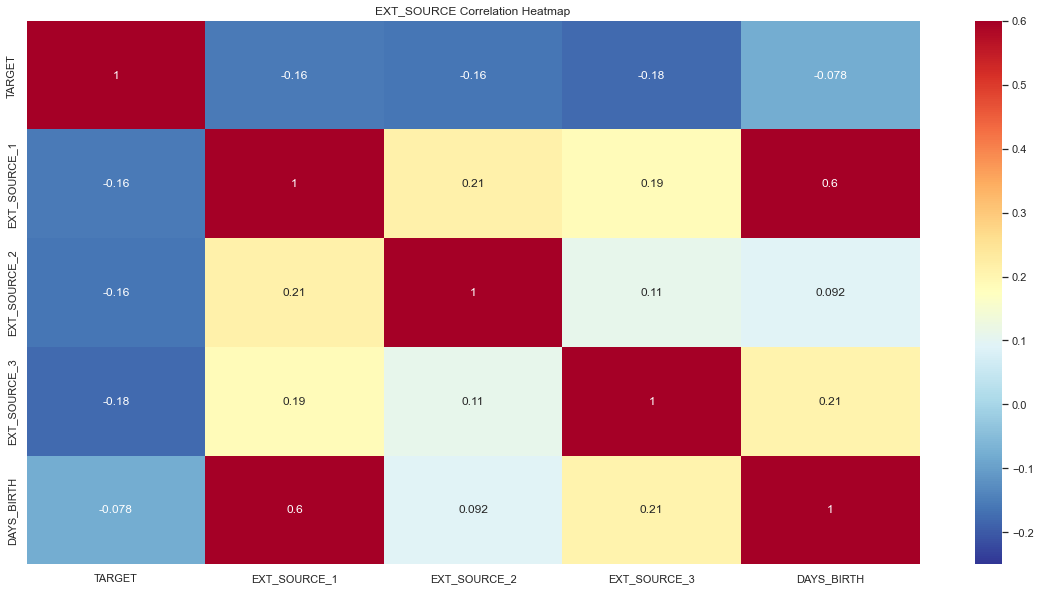

In [549]:
#Heatmap of correlations with highest correlated features
plt.figure(figsize = (20,10))
sns.heatmap(train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']].corr(),
            cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6,
           )
plt.title('EXT_SOURCE Correlation Heatmap')
plt.show()

Ces sources extérieures sont corrélées négativement avec la Target (Attention, négativement mais avec de très faibles coefficients). Malgré tout, on peut penser que si la valeur augmente, le client est plus susceptible de pouvoir rembourser le crédit. Notons que 'DAYS_BIRTH' est corrélée avec 'EXT_SOURCE_1', peut-être l'un des facteurs de ce score est l'âge du client.

## | Column description | how to identify clients in default

In [550]:
pd.set_option('display.max_rows', 220)
col_descr

,Table,Row,Description,Special
1,application_{train|test}.csv,SK_ID_CURR,ID of loan in our sample,NaN
2,application_{train|test}.csv,TARGET,"Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)",NaN
5,application_{train|test}.csv,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
6,application_{train|test}.csv,CODE_GENDER,Gender of the client,NaN
7,application_{train|test}.csv,FLAG_OWN_CAR,Flag if the client owns a car,NaN
8,application_{train|test}.csv,FLAG_OWN_REALTY,Flag if client owns a house or flat,NaN
9,application_{train|test}.csv,CNT_CHILDREN,Number of children the client has,NaN
10,application_{train|test}.csv,AMT_INCOME_TOTAL,Income of the client,NaN
11,application_{train|test}.csv,AMT_CREDIT,Credit amount of the loan,NaN
12,application_{train|test}.csv,AMT_ANNUITY,Loan annuity,NaN


In [551]:
pd.set_option('display.max_rows', 50)

How to identify a client in default ? Its target is set on 1.<br>
But can we find other evidence of default in the train / test dataframe?

In [552]:
col_descr[col_descr.Description.str.contains("default")]

,Table,Row,Description,Special
94,application_{train|test}.csv,OBS_30_CNT_SOCIAL_CIRCLE,How many observation of client's social surroundings with observable 30 DPD (days past due) default,NaN
95,application_{train|test}.csv,DEF_30_CNT_SOCIAL_CIRCLE,How many observation of client's social surroundings defaulted on 30 DPD (days past due),NaN
96,application_{train|test}.csv,OBS_60_CNT_SOCIAL_CIRCLE,How many observation of client's social surroundings with observable 60 DPD (days past due) default,NaN
97,application_{train|test}.csv,DEF_60_CNT_SOCIAL_CIRCLE,How many observation of client's social surroundings defaulted on 60 (days past due) DPD,NaN


In [553]:
df.loc[: , "DEF_30_CNT_SOCIAL_CIRCLE"].unique()

array([ 2.,  0.,  1., nan,  3.,  4.,  5.,  6.,  7., 34.,  8.])

In [554]:
df.loc[(df["DEF_30_CNT_SOCIAL_CIRCLE"] >1) & (df["TARGET"] == 0)  ,:]

,index,SK_ID_CURR,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,...,CC_NAME_CONTRACT_STATUS_Demand_MAX,CC_NAME_CONTRACT_STATUS_Demand_MEAN,CC_NAME_CONTRACT_STATUS_Demand_SUM,CC_NAME_CONTRACT_STATUS_Demand_VAR,CC_NAME_CONTRACT_STATUS_Refused_MIN,CC_NAME_CONTRACT_STATUS_Refused_MAX,CC_NAME_CONTRACT_STATUS_Refused_MEAN,CC_NAME_CONTRACT_STATUS_Refused_SUM,CC_NAME_CONTRACT_STATUS_Refused_VAR,CC_NAME_CONTRACT_STATUS_Sent proposal_MIN,CC_NAME_CONTRACT_STATUS_Sent proposal_MAX,CC_NAME_CONTRACT_STATUS_Sent proposal_MEAN,CC_NAME_CONTRACT_STATUS_Sent proposal_SUM,CC_NAME_CONTRACT_STATUS_Sent proposal_VAR,CC_NAME_CONTRACT_STATUS_Signed_MIN,CC_NAME_CONTRACT_STATUS_Signed_MAX,CC_NAME_CONTRACT_STATUS_Signed_MEAN,CC_NAME_CONTRACT_STATUS_Signed_SUM,CC_NAME_CONTRACT_STATUS_Signed_VAR,CC_NAME_CONTRACT_STATUS_nan_MIN,CC_NAME_CONTRACT_STATUS_nan_MAX,CC_NAME_CONTRACT_STATUS_nan_MEAN,CC_NAME_CONTRACT_STATUS_nan_SUM,CC_NAME_CONTRACT_STATUS_nan_VAR,CC_COUNT
99,99,100118,0.0,1,0,0,0,90000.0,675000.0,26541.0,675000.0,0.026392,-22471,NaN,-217.0,-4323,NaN,1,0,0,1,0,0,1.0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
102,102,100121,0.0,0,0,0,0,126000.0,787131.0,26145.0,679500.0,0.018209,-16798,-669.0,-9388.0,-347,NaN,1,1,1,1,1,0,2.0,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,123,100144,0.0,1,0,1,0,112500.0,535500.0,30028.5,535500.0,0.028663,-16759,-4560.0,-3079.0,-296,NaN,1,1,0,1,0,0,1.0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42.0
192,192,100224,0.0,1,1,0,2,225000.0,1256400.0,36864.0,900000.0,0.019689,-14091,-5664.0,-8127.0,-2462,7.0,1,1,0,1,0,0,4.0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,95.0
252,252,100292,0.0,1,0,0,0,202500.0,675000.0,29862.0,675000.0,0.028663,-21185,NaN,-1702.0,-4229,NaN,1,0,0,1,0,1,2.0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307331,307331,456055,0.0,1,0,0,0,333000.0,1113840.0,44302.5,900000.0,0.010032,-18519,-11084.0,-3208.0,-2052,NaN,1,1,0,1,0,0,2.0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
307380,307380,456105,0.0,0,1,1,0,225000.0,1005120.0,29389.5,720000.0,0.035792,-13629,-1705.0,-7456.0,-1050,2.0,1,1,1,1,1,0,2.0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,96.0
307416,307416,456149,0.0,1,1,0,0,90000.0,327024.0,21982.5,270000.0,0.020713,-11478,-1056.0,-5400.0,-3733,20.0,1,1,0,1,0,0,1.0,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
307469,307469,456209,0.0,1,0,0,0,202500.0,703728.0,29943.0,607500.0,0.031329,-22414,NaN,-11976.0,-4171,NaN,1,0,0,1,0,0,1.0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Target** : (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)

**DEF_30_CNT_SOCIAL_CIRCLE** : How many observation of client's social surroundings defaulted on 30 DPD (days past due)

**Conclusion** : There seems to be no specific link between "Target" and "DEF_30_CNT_SOCIAL_CIRCLE" : several clients with more than 1 observations of social surroundings whom defaulted are not targetted 1 but 0.

## | Identifying unbalanced sample (Target)

When **Target = "NaN"**, the row came from the **application_test file**, and should not be counted nor included in the training data set.

In [555]:
df.loc[(df["TARGET"] != 0) & (df["TARGET"] != 1) ,:].shape[0] / df.shape[0]

0.1368248790880587

In [556]:
df.loc[(df["TARGET"] != 0) & (df["TARGET"] != 1) ,:].shape[0] 

48744

In [557]:
mask = (df["TARGET"] != 0) & (df["TARGET"] != 1)

In [558]:
df.loc[df["TARGET"] == 1 ,:].shape[0] / df[~mask].shape[0]

0.08072986956394489

In [559]:
df.loc[df["TARGET"] == 0 ,:].shape[0] / df[~mask].shape[0]

0.9192701304360551

In [560]:
tot_target = df.loc[df["TARGET"] == 1 ,:].shape[0] / df[~mask].shape[0] + df.loc[df["TARGET"] == 0 ,:].shape[0] / df[~mask].shape[0]
tot_target

1.0

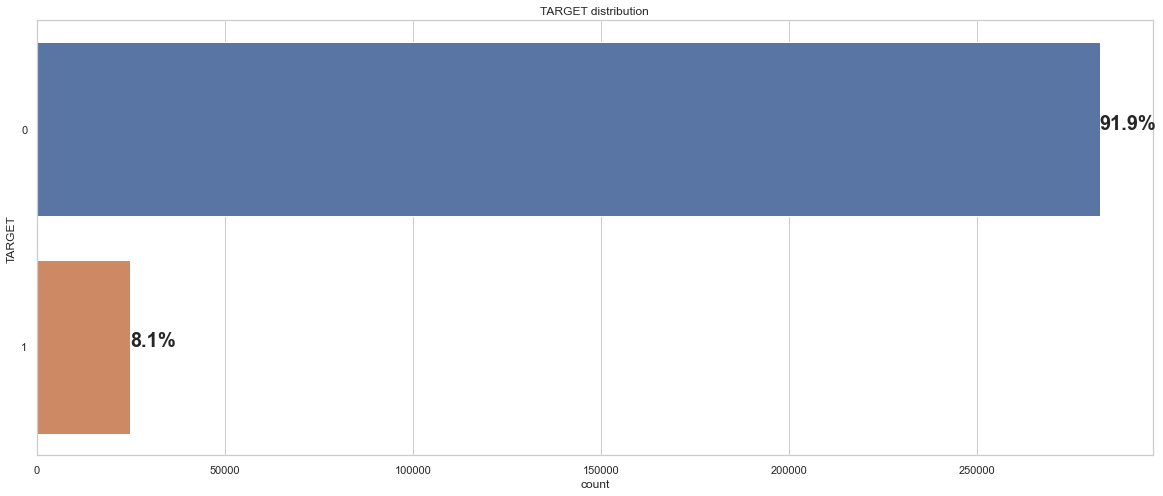

In [561]:
ax, fig = plt.subplots(figsize=(20,8)) 
ax = sns.countplot(y='TARGET', data=train)
ax.set_title("TARGET distribution")

for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/len(train.TARGET))
        x = p.get_x() + p.get_width()
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y), fontsize=20, fontweight='bold')
        
plt.show()

Environ **8%** des clients sont **en défaut**, contre **92% sans défault**. <br>

Le jeu de données d'entrainement est **déséquilibré**. <br> La classe majoritaire est de **taille 11 fois supérieure** à la classe minoritaire, les **clients en défaut**, qui est notre **classe d'intérêt prioritaire** sur laquelle nous souhaitons avoir une bonne **qualité de prédiction**.<br> 
Ce déséquilibre doit être **pris en compte** dans l'**entrainement des modèles**.  <br>
En effet un modèle "naif" prédisant systématiquement que les clients sont sans défaut aurait une **justesse (accuracy) de 92%** alors qu'il ne **permettrait pas de détecter** les clients à risque.


## | Creating data_train / data_test

Il est nécessaire de commencer par la mise en place des données d'entrainement / test.<br>
On peut procéder en rappel avec les jeux de données application_train/test.

In [562]:
data_train = df[df['SK_ID_CURR'].isin(train.SK_ID_CURR)]
data_test = df[df['SK_ID_CURR'].isin(test.SK_ID_CURR)]

data_test = data_test.drop('TARGET', axis=1)

In [563]:
data_train.set_index('SK_ID_CURR', inplace=True)
data_test.set_index('SK_ID_CURR', inplace=True)

In [564]:
print('Training Features shape with categorical columns: ', data_train.shape)
print('Testing Features shape with categorical columns: ', data_test.shape)

Training Features shape with categorical columns:  (307507, 797)
Testing Features shape with categorical columns:  (48744, 796)


In [565]:
#Number of each type of column
data_train.dtypes.value_counts()

float64    622
uint8      133
int64       42
dtype: int64

In [566]:
data_train.describe()

,index,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,...,CC_NAME_CONTRACT_STATUS_Demand_MAX,CC_NAME_CONTRACT_STATUS_Demand_MEAN,CC_NAME_CONTRACT_STATUS_Demand_SUM,CC_NAME_CONTRACT_STATUS_Demand_VAR,CC_NAME_CONTRACT_STATUS_Refused_MIN,CC_NAME_CONTRACT_STATUS_Refused_MAX,CC_NAME_CONTRACT_STATUS_Refused_MEAN,CC_NAME_CONTRACT_STATUS_Refused_SUM,CC_NAME_CONTRACT_STATUS_Refused_VAR,CC_NAME_CONTRACT_STATUS_Sent proposal_MIN,CC_NAME_CONTRACT_STATUS_Sent proposal_MAX,CC_NAME_CONTRACT_STATUS_Sent proposal_MEAN,CC_NAME_CONTRACT_STATUS_Sent proposal_SUM,CC_NAME_CONTRACT_STATUS_Sent proposal_VAR,CC_NAME_CONTRACT_STATUS_Signed_MIN,CC_NAME_CONTRACT_STATUS_Signed_MAX,CC_NAME_CONTRACT_STATUS_Signed_MEAN,CC_NAME_CONTRACT_STATUS_Signed_SUM,CC_NAME_CONTRACT_STATUS_Signed_VAR,CC_NAME_CONTRACT_STATUS_nan_MIN,CC_NAME_CONTRACT_STATUS_nan_MAX,CC_NAME_CONTRACT_STATUS_nan_MEAN,CC_NAME_CONTRACT_STATUS_nan_SUM,CC_NAME_CONTRACT_STATUS_nan_VAR,CC_COUNT
count,307507.000000,307507.00000,307507.000000,307507.000000,307507.000000,307507.000000,3.075070e+05,3.075070e+05,307495.000000,3.072290e+05,307507.000000,307507.000000,252133.000000,307507.000000,307507.000000,104580.000000,307507.000000,307507.000000,307507.000000,307507.000000,307507.000000,307507.000000,307505.000000,307507.000000,307507.000000,...,86905.000000,86905.000000,86905.0000,86273.000000,86905.0,86905.000000,86905.000000,86905.000000,86273.000000,86905.0,86905.000000,86905.000000,86905.000000,86273.000000,86905.000000,86905.000000,86905.000000,86905.000000,86273.00000,86905.0,86905.0,86905.0,86905.0,86273.0,86905.000000
mean,153755.870793,0.08073,0.658352,0.340106,0.306331,0.417047,1.687977e+05,5.990286e+05,27108.666786,5.383977e+05,0.020868,-16037.027271,-2384.142254,-4986.131376,-2994.201670,12.061121,0.999997,0.819887,0.199358,0.998133,0.281057,0.056721,2.152658,2.052461,2.031518,...,0.000173,0.000106,0.0097,0.000030,0.0,0.000161,0.000002,0.000161,0.000002,0.0,0.005293,0.000064,0.005293,0.000064,0.000368,0.049376,0.003738,0.114366,0.00307,0.0,0.0,0.0,0.0,0.0,37.143605
std,88770.888212,0.27242,0.474263,0.473745,0.460970,0.722119,2.371246e+05,4.024926e+05,14493.798379,3.694472e+05,0.013831,4363.982424,2338.327666,3522.883030,1509.454566,11.944919,0.001803,0.384282,0.399518,0.043164,0.449516,0.231308,0.910680,0.509034,0.502737,...,0.013137,0.008740,0.8112,0.002463,0.0,0.012691,0.000155,0.012691,0.000156,0.0,0.072562,0.000877,0.072562,0.000881,0.019186,0.216653,0.031882,1.323208,0.02036,0.0,0.0,0.0,0.0,0.0,33.698512
min,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,-24672.000000,-7197.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.0000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,1.000000
25%,76878.500000,0.00000,0.000000,0.000000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-3175.000000,-7479.500000,-4299.000000,5.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000000,2.000000,...,0.000000,0.000000,0.0000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,10.000000
50%,153756.000000,0.00000,1.000000,0.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1648.000000,-4504.000000,-3254.000000,9.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000000,2.000000,...,0.000000,0.00

## | Feature elimination

### | Manual columns removal based on business knowledge

This list may vary after modelisation and feature interpretation :

In [567]:
features_to_remove = [
    "APPROVED_HOUR_APPR_PROCESS_START_MAX",
    "REG_CITY_NOT_WORK_CITY",
    "EMERGENCYSTATE_MODE_No",
    "PREV_NAME_CONTRACT_STATUTS_Refused_MEAN"
]

Applying this filter to the data_train and data_test set :

In [568]:
data_train = data_train.loc[ : , ~data_train.columns.isin(features_to_remove)]

In [569]:
data_test = data_test.loc[ : , ~data_test.columns.isin(features_to_remove)]

### | Columns removal based on missing values

In [570]:
# display the number and the name of the columns to delete because exceeding 55% missing values

df_missing=data_train.isna()
result=df_missing.sum()/len(data_train)
result

index                               0.000000
TARGET                              0.000000
CODE_GENDER                         0.000000
FLAG_OWN_CAR                        0.000000
FLAG_OWN_REALTY                     0.000000
                                      ...   
CC_NAME_CONTRACT_STATUS_nan_MAX     0.717389
CC_NAME_CONTRACT_STATUS_nan_MEAN    0.717389
CC_NAME_CONTRACT_STATUS_nan_SUM     0.717389
CC_NAME_CONTRACT_STATUS_nan_VAR     0.719444
CC_COUNT                            0.717389
Length: 794, dtype: float64

In [571]:
# set threshold for maximum missing values accepted in a column
missing_threshold = 0.6

In [572]:
len(data_train.loc[:,result > missing_threshold].columns)

212

En fixant le threshold à 60% de manquants maximum, on supprime 212 colonnes du jeu de données. 

In [573]:
data_train.loc[:,result > missing_threshold].columns

Index(['OWN_CAR_AGE', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'FLOORSMIN_AVG', 'LIVINGAPARTMENTS_AVG', 'NONLIVINGAPARTMENTS_AVG', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'FLOORSMIN_MODE', 'LIVINGAPARTMENTS_MODE',
       ...
       'CC_NAME_CONTRACT_STATUS_Signed_MAX', 'CC_NAME_CONTRACT_STATUS_Signed_MEAN', 'CC_NAME_CONTRACT_STATUS_Signed_SUM', 'CC_NAME_CONTRACT_STATUS_Signed_VAR', 'CC_NAME_CONTRACT_STATUS_nan_MIN', 'CC_NAME_CONTRACT_STATUS_nan_MAX', 'CC_NAME_CONTRACT_STATUS_nan_MEAN', 'CC_NAME_CONTRACT_STATUS_nan_SUM', 'CC_NAME_CONTRACT_STATUS_nan_VAR', 'CC_COUNT'], dtype='object', length=212)

In [574]:
columns_to_keep = data_train.loc[:,result < missing_threshold].columns

In [575]:
data_train = data_train[columns_to_keep]

In [576]:
columns_to_keep_test = columns_to_keep.drop("TARGET")

In [577]:
data_test = data_test[columns_to_keep_test]

In [578]:
data_train

,index,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,...,INSTAL_DPD_MAX,INSTAL_DPD_MEAN,INSTAL_DPD_SUM,INSTAL_DBD_MAX,INSTAL_DBD_MEAN,INSTAL_DBD_SUM,INSTAL_PAYMENT_PERC_MAX,INSTAL_PAYMENT_PERC_MEAN,INSTAL_PAYMENT_PERC_SUM,INSTAL_PAYMENT_PERC_VAR,INSTAL_PAYMENT_DIFF_MAX,INSTAL_PAYMENT_DIFF_MEAN,INSTAL_PAYMENT_DIFF_SUM,INSTAL_PAYMENT_DIFF_VAR,INSTAL_AMT_INSTALMENT_MAX,INSTAL_AMT_INSTALMENT_MEAN,INSTAL_AMT_INSTALMENT_SUM,INSTAL_AMT_PAYMENT_MIN,INSTAL_AMT_PAYMENT_MAX,INSTAL_AMT_PAYMENT_MEAN,INSTAL_AMT_PAYMENT_SUM,INSTAL_DAYS_ENTRY_PAYMENT_MAX,INSTAL_DAYS_ENTRY_PAYMENT_MEAN,INSTAL_DAYS_ENTRY_PAYMENT_SUM,INSTAL_COUNT
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100002,0,1.0,0,0,0,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637.0,-3648.0,-2120,1,1,0,1,1,0,1.0,2,2,10,...,0.0,0.000000,0.0,31.0,20.421053,388.0,1.00000,1.000000,19.000000,0.000000,0.000,0.000000,0.000,0.000000e+00,53093.745,11559.247105,219625.695,9251.775,53093.745,11559.247105,219625.695,-49.0,-315.421053,-5993.0,19.0
100003,1,0.0,1,0,1,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188.0,-1186.0,-291,1,1,0,1,1,0,2.0,1,1,11,...,0.0,0.000000,0.0,14.0,7.160000,179.0,1.00000,1.000000,25.000000,0.000000,0.000,0.000000,0.000,0.000000e+00,560835.360,64754.586000,1618864.650,6662.970,560835.360,64754.586000,1618864.650,-544.0,-1385.320000,-34633.0,25.0
100004,2,0.0,0,1,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225.0,-4260.0,-2531,1,1,1,1,1,0,1.0,2,2,9,...,0.0,0.000000,0.0,11.0,7.666667,23.0,1.00000,1.000000,3.000000,0.000000,0.000,0.000000,0.000,0.000000e+00,10573.965,7096.155000,21288.465,5357.250,10573.965,7096.155000,21288.465,-727.0,-761.666667,-2285.0,3.0
100006,3,0.0,1,0,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039.0,-9833.0,-2437,1,1,0,1,0,0,2.0,2,2,17,...,0.0,0.000000,0.0,77.0,19.375000,310.0,1.00000,1.000000,16.000000,0.000000,0.000,0.000000,0.000,0.000000e+00,691786.890,62947.088438,1007153.415,2482.920,691786.890,62947.088438,1007153.415,-12.0,-271.625000,-4346.0,16.0
100007,4,0.0,0,0,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038.0,-4311.0,-3458,1,1,0,1,0,0,1.0,2,2,11,...,12.0,0.954545,63.0,31.0,4.590909,303.0,1.00000,0.954545,63.000000,0.043995,22655.655,452.384318,29857.365,8.084830e+06,22678.785,12666.444545,835985.340,0.180,22678.785,12214.060227,806127.975,-14.0,-1032.242424,-68128.0,66.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456251,307506,0.0,0,0,1,0,157500.0,254700.0,27558.0,225000.0,0.032561,-9327,-236.0,-8456.0,-1982,1,1,0,1,0,0,1.0,1,1,15,...,0.0,0.000000,0.0,46.0,36.285714,254.0,1.00000,1.000000,7.000000,0.000000,0.000,0.000000,0.000,0.000000e+00,12815.010,7492.924286,52450.470,6605.910,12815.010,7492.924286,52450.470,-38.0,-156.285714,-1094.0,7.0
456252,307507,0.0,1,0,0,0,72000.0,269550.0,12001.5,225000.0,0.025164,-20775,NaN,-4388.0,-4090,1,0,0,1,1,0,1.0,2,2,8,...,3.0,0.500000,3.0,11.0,3.333333,20.0,1.00000,1.000000,6.000000,0.000000,0.000,0.000000,0.000,0.000000e+00,10074.465,10069.867500,60419.205,10046.880,10074.465,10069.867500,60419.205,-2327.0,-2393.833333,-14363.0,6.0
456253,307508,0.0,1,0,0,0,153000.0,677664.0,29979.0,585000.0,0.005002,-14966,-7921.0,-6737.0,-5150,1,1,0,1,0,1,1.0,3,3,9,...,9.0,0.642857,9.0,51.0,15.142857,212.0,1.00000,0.928571,13.000000,0.070380,3945.825,283.792500,3973.095,1.110980e+06,5575.185,4399.707857,61595.910,27.270,5575.185,4115.915357,57622.815,-1738.0,-2387.428571,-33424.0,14.0


Notre dataset contient maintenant 585 colonnes.

### | Columns removal based on standard deviation

In [579]:
stdt = data_train.apply("std")!=0

In [580]:
nb_feat=data_train.loc[:,stdt[stdt].index].shape[1]

In [581]:
print('En retenant les features dont la standard deviation est nulle\non conserve',
      nb_feat, 'features sur un total actuel de', data_train.shape[1],'features.\nOn en supprime',\
      data_train.shape[1] - nb_feat)

En retenant les features dont la standard deviation est nulle
on conserve 563 features sur un total actuel de 582 features.
On en supprime 19


In [582]:
columns_to_keep = stdt[stdt].index

In [583]:
data_train = data_train[columns_to_keep]

In [584]:
columns_to_keep_test = columns_to_keep.drop("TARGET")

In [585]:
data_test = data_test[columns_to_keep_test]

In [586]:
data_train

,index,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,...,INSTAL_DPD_MAX,INSTAL_DPD_MEAN,INSTAL_DPD_SUM,INSTAL_DBD_MAX,INSTAL_DBD_MEAN,INSTAL_DBD_SUM,INSTAL_PAYMENT_PERC_MAX,INSTAL_PAYMENT_PERC_MEAN,INSTAL_PAYMENT_PERC_SUM,INSTAL_PAYMENT_PERC_VAR,INSTAL_PAYMENT_DIFF_MAX,INSTAL_PAYMENT_DIFF_MEAN,INSTAL_PAYMENT_DIFF_SUM,INSTAL_PAYMENT_DIFF_VAR,INSTAL_AMT_INSTALMENT_MAX,INSTAL_AMT_INSTALMENT_MEAN,INSTAL_AMT_INSTALMENT_SUM,INSTAL_AMT_PAYMENT_MIN,INSTAL_AMT_PAYMENT_MAX,INSTAL_AMT_PAYMENT_MEAN,INSTAL_AMT_PAYMENT_SUM,INSTAL_DAYS_ENTRY_PAYMENT_MAX,INSTAL_DAYS_ENTRY_PAYMENT_MEAN,INSTAL_DAYS_ENTRY_PAYMENT_SUM,INSTAL_COUNT
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100002,0,1.0,0,0,0,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637.0,-3648.0,-2120,1,1,0,1,1,0,1.0,2,2,10,...,0.0,0.000000,0.0,31.0,20.421053,388.0,1.00000,1.000000,19.000000,0.000000,0.000,0.000000,0.000,0.000000e+00,53093.745,11559.247105,219625.695,9251.775,53093.745,11559.247105,219625.695,-49.0,-315.421053,-5993.0,19.0
100003,1,0.0,1,0,1,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188.0,-1186.0,-291,1,1,0,1,1,0,2.0,1,1,11,...,0.0,0.000000,0.0,14.0,7.160000,179.0,1.00000,1.000000,25.000000,0.000000,0.000,0.000000,0.000,0.000000e+00,560835.360,64754.586000,1618864.650,6662.970,560835.360,64754.586000,1618864.650,-544.0,-1385.320000,-34633.0,25.0
100004,2,0.0,0,1,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225.0,-4260.0,-2531,1,1,1,1,1,0,1.0,2,2,9,...,0.0,0.000000,0.0,11.0,7.666667,23.0,1.00000,1.000000,3.000000,0.000000,0.000,0.000000,0.000,0.000000e+00,10573.965,7096.155000,21288.465,5357.250,10573.965,7096.155000,21288.465,-727.0,-761.666667,-2285.0,3.0
100006,3,0.0,1,0,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039.0,-9833.0,-2437,1,1,0,1,0,0,2.0,2,2,17,...,0.0,0.000000,0.0,77.0,19.375000,310.0,1.00000,1.000000,16.000000,0.000000,0.000,0.000000,0.000,0.000000e+00,691786.890,62947.088438,1007153.415,2482.920,691786.890,62947.088438,1007153.415,-12.0,-271.625000,-4346.0,16.0
100007,4,0.0,0,0,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038.0,-4311.0,-3458,1,1,0,1,0,0,1.0,2,2,11,...,12.0,0.954545,63.0,31.0,4.590909,303.0,1.00000,0.954545,63.000000,0.043995,22655.655,452.384318,29857.365,8.084830e+06,22678.785,12666.444545,835985.340,0.180,22678.785,12214.060227,806127.975,-14.0,-1032.242424,-68128.0,66.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456251,307506,0.0,0,0,1,0,157500.0,254700.0,27558.0,225000.0,0.032561,-9327,-236.0,-8456.0,-1982,1,1,0,1,0,0,1.0,1,1,15,...,0.0,0.000000,0.0,46.0,36.285714,254.0,1.00000,1.000000,7.000000,0.000000,0.000,0.000000,0.000,0.000000e+00,12815.010,7492.924286,52450.470,6605.910,12815.010,7492.924286,52450.470,-38.0,-156.285714,-1094.0,7.0
456252,307507,0.0,1,0,0,0,72000.0,269550.0,12001.5,225000.0,0.025164,-20775,NaN,-4388.0,-4090,1,0,0,1,1,0,1.0,2,2,8,...,3.0,0.500000,3.0,11.0,3.333333,20.0,1.00000,1.000000,6.000000,0.000000,0.000,0.000000,0.000,0.000000e+00,10074.465,10069.867500,60419.205,10046.880,10074.465,10069.867500,60419.205,-2327.0,-2393.833333,-14363.0,6.0
456253,307508,0.0,1,0,0,0,153000.0,677664.0,29979.0,585000.0,0.005002,-14966,-7921.0,-6737.0,-5150,1,1,0,1,0,1,1.0,3,3,9,...,9.0,0.642857,9.0,51.0,15.142857,212.0,1.00000,0.928571,13.000000,0.070380,3945.825,283.792500,3973.095,1.110980e+06,5575.185,4399.707857,61595.910,27.270,5575.185,4115.915357,57622.815,-1738.0,-2387.428571,-33424.0,14.0


In [ ]:
print('Notre dataset contient maintenant',data_train.shape[1],' colonnes.')

### | Columns removal based on correlation with TARGET

On **élimine** du jeu de données les features **les moins corrélées à TARGET** (corrélation proche de 0), car elles ont un **impact limité sur TARGET** et **complexifient et allongent les calculs**:

#### | calcul des corrélations avec TARGET et application du seuil

Cette opération risque de supprimer la colonne 'SK_ID_CURR'. Pour éviter de perdre cette colonne:
-  on copie les données de la colonne
-  on réalise le cut des features les moins corrélées
-  on ajoute la colonne 'SK_ID_CURR' au df final

--> Pas un problème, cette info est déjà en index

In [587]:
corr_target = data_train.corrwith(data_train["TARGET"])

<AxesSubplot:ylabel='Frequency'>

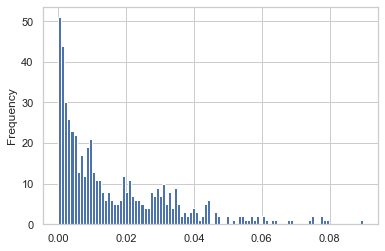

In [588]:
# visualisation de la distribution des corrélations des features
corr_target.apply("abs").sort_values(ascending=False)[4:].plot.hist(bins=100)

In [589]:
corr_target.apply("abs").sort_values(ascending=False)[0:15]

TARGET                                    1.000000
EXT_SOURCE_3                              0.178926
EXT_SOURCE_2                              0.160471
EXT_SOURCE_1                              0.155317
BURO_DAYS_CREDIT_MEAN                     0.089731
BURO_CREDIT_ACTIVE_Closed_MEAN            0.079369
DAYS_BIRTH                                0.078242
PREV_NAME_CONTRACT_STATUS_Refused_MEAN    0.077681
BURO_CREDIT_ACTIVE_Active_MEAN            0.077356
BURO_DAYS_CREDIT_MIN                      0.075248
DAYS_EMPLOYED                             0.074957
PREV_CODE_REJECT_REASON_XAP_MEAN          0.073938
BURO_DAYS_CREDIT_UPDATE_MEAN              0.068929
DAYS_EMPLOYED_PERC                        0.067952
ACTIVE_DAYS_CREDIT_MEAN                   0.064041
dtype: float64

In [590]:
# si pb mémoire augmenter le seuil
seuil_cor = 0.03

In [591]:
ct = corr_target.apply("abs")>seuil_cor

In [592]:
nb_feat=data_train.loc[:,ct[ct].index].shape[1]

In [593]:
print('En retenant les features dont la corrélation avec TARGET est supérieure au seuil de', seuil_cor,
      '\non conserve',nb_feat,'features.')

En retenant les features dont la corrélation avec TARGET est supérieure au seuil de 0.03 
on conserve 115 features.


In [594]:
data_train = data_train.loc[:,ct[ct].index]

In [595]:
# on rajoute la colonne SK_ID_CURR au df final
data_train["SK_ID_CURR"] = data_train.index

In [596]:
data_train.isna().sum().sum()

4174564

In [597]:
data_train

,TARGET,CODE_GENDER,AMT_CREDIT,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_EMP_PHONE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_LIVE_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,ELEVATORS_AVG,FLOORSMAX_AVG,LIVINGAREA_AVG,ELEVATORS_MODE,FLOORSMAX_MODE,LIVINGAREA_MODE,ELEVATORS_MEDI,FLOORSMAX_MEDI,...,PREV_NAME_YIELD_GROUP_high_MEAN,PREV_NAME_YIELD_GROUP_low_normal_MEAN,PREV_PRODUCT_COMBINATION_Card Street_MEAN,PREV_PRODUCT_COMBINATION_Cash Street: high_MEAN,PREV_PRODUCT_COMBINATION_Cash X-Sell: high_MEAN,PREV_PRODUCT_COMBINATION_Cash X-Sell: low_MEAN,PREV_PRODUCT_COMBINATION_POS industry with interest_MEAN,APPROVED_AMT_ANNUITY_MAX,APPROVED_AMT_ANNUITY_MEAN,APPROVED_AMT_APPLICATION_MAX,APPROVED_AMT_APPLICATION_MEAN,APPROVED_APP_CREDIT_PERC_MAX,APPROVED_AMT_GOODS_PRICE_MAX,APPROVED_AMT_GOODS_PRICE_MEAN,APPROVED_HOUR_APPR_PROCESS_START_MEAN,APPROVED_RATE_DOWN_PAYMENT_MAX,APPROVED_DAYS_DECISION_MIN,APPROVED_DAYS_DECISION_MEAN,POS_MONTHS_BALANCE_MEAN,POS_MONTHS_BALANCE_SIZE,POS_COUNT,INSTAL_DBD_SUM,INSTAL_DAYS_ENTRY_PAYMENT_MEAN,INSTAL_DAYS_ENTRY_PAYMENT_SUM,SK_ID_CURR
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100002,1.0,0,406597.5,351000.0,0.018801,-9461,-637.0,-3648.0,-2120,1,2,2,0,0,0.083037,0.262949,0.139376,0.00,0.0833,0.0190,0.0000,0.0833,0.0198,0.00,0.0833,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9251.775,9251.7750,179055.0,179055.000,1.000000,179055.0,179055.000,9.000000,0.000000,-606.0,-606.000000,-10.000000,19.0,19.0,388.0,-315.421053,-5993.0,100002
100003,0.0,1,1293502.5,1129500.0,0.003541,-16765,-1188.0,-1186.0,-291,1,1,1,0,0,0.311267,0.622246,NaN,0.08,0.2917,0.0549,0.0806,0.2917,0.0554,0.08,0.2917,...,0.000000,0.333333,0.000000,0.000000,0.000000,0.333333,0.333333,98356.995,56553.9900,900000.0,435436.500,1.011109,900000.0,435436.500,14.666667,0.100061,-2341.0,-1305.000000,-43.785714,28.0,28.0,179.0,-1385.320000,-34633.0,100003
100004,0.0,0,135000.0,135000.0,0.010032,-19046,-225.0,-4260.0,-2531,1,2,2,0,0,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5357.250,5357.2500,24282.0,24282.000,1.207699,24282.0,24282.000,5.000000,0.212008,-815.0,-815.000000,-25.500000,4.0,4.0,23.0,-761.666667,-2285.0,100004
100006,0.0,1,312682.5,297000.0,0.008019,-19005,-3039.0,-9833.0,-2437,1,2,2,0,0,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.222222,0.222222,0.111111,0.000000,0.111111,0.222222,0.111111,39954.510,21842.1900,675000.0,352265.868,1.250017,675000.0,352265.868,14.400000,0.217830,-617.0,-345.600000,-9.619048,21.0,21.0,310.0,-271.625000,-4346.0,100006
100007,0.0,0,513000.0,513000.0,0.028663,-19932,-3038.0,-4311.0,-3458,1,2,2,0,1,NaN,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.500000,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000,22678.785,12278.8050,247500.0,150530.250,1.175185,247500.0,150530.250,12.333333,0.218890,-2357.0,-1222.833333,-33.636364,66.0,66.0,303.0,-1032.242424,-68128.0,100007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456251,0.0,0,254700.0,225000.0,0.032561,-9327,-236.0,-8456.0,-1982,1,1,1,0,0,0.145570,0.681632,NaN,0.22,0.6042,0.1965,0.0806,0.4583,0.0853,0.22,0.6042,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6605.910,6605.9100,40455.0,40455.000,1.000000,40455.0,40455.000,17.000000,0.000000,-273.0,-273.000000,-5.000000,9.0,9.0,254.0,-156.285714,-1094.0,456251
456252,0.0,1,269550.0,225000.0,0.025164,-20775,NaN,-4388.0,-4090,0,2,2,0,0,NaN,0.115992,NaN,0.00,0.0833,0.0257,0.0000,0.0833,0.0267,0.00,0.0833,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10074.465,10074.4650,57595.5,57595.500,1.013622,57595.5,57595.500,10.000000,0.062443,-2497.0,-2497.000000,-79.000000,7.0,7.0,2

#### | Vérification des corrélations restantes après cette étape de diminution des features

In [598]:
# calcul des corrélations avec TARGET
corr_target_ctrl = data_train.corrwith(data_train["TARGET"])

<AxesSubplot:ylabel='Frequency'>

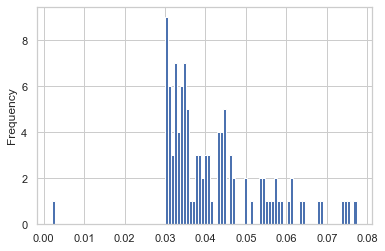

In [610]:
# visualisation de la distribution des corrélations des features
corr_target_ctrl.apply("abs").sort_values(ascending=False)[8:].plot.hist(bins=100)

In [611]:
corr_target_ctrl.apply("abs").sort_values(ascending=False)

TARGET                                             1.000000
EXT_SOURCE_3                                       0.178926
EXT_SOURCE_2                                       0.160471
EXT_SOURCE_1                                       0.155317
BURO_DAYS_CREDIT_MEAN                              0.089731
                                                     ...   
OCCUPATION_TYPE_Drivers                            0.030303
PREV_NAME_GOODS_CATEGORY_Furniture_MEAN            0.030174
PREV_PRODUCT_COMBINATION_Cash X-Sell: high_MEAN    0.030155
PREV_PRODUCT_COMBINATION_Cash Street: high_MEAN    0.030138
SK_ID_CURR                                         0.002111
Length: 116, dtype: float64

## | Aligning data feature shape 

### | Separate TARGET from data_train

In [613]:
TARGET = data_train.TARGET #save our TARGET variable
data_train.drop('TARGET', axis=1, inplace=True) #remove TARGET from train

#Align the datasets
data_train, data_test = data_train.align(data_test, join='inner', axis=1)

In [614]:
print(data_train.shape)
print(data_test.shape)

(307507, 114)
(48744, 114)


### | Infinite values (np.nan) / Valeurs manquantes (imputation médiane)

L'une des approches les plus simples consiste à remplacer les NaN par la Médiane (ou Moyenne) pour les variables correspondantes.

In [615]:
print('Missing values in train data: ', sum(data_train.isnull().sum()))
print('Missing values in test data: ', sum(data_test.isnull().sum()))

Missing values in train data:  4174564
Missing values in test data:  545397


**Train dataset :**

In [616]:
print(np.any(np.isfinite(data_train)))

True


In [617]:
data_train[data_train==np.inf] = np.nan

In [618]:
imputer = SimpleImputer(strategy='median', missing_values=np.nan)
idata_train = pd.DataFrame(imputer.fit_transform(data_train))
idata_train.columns=data_train.columns
idata_train.index=data_train.index
idata_train.shape

(307507, 114)

In [619]:
data_train = idata_train
data_train.shape

(307507, 114)

In [620]:
#Check Imputation step
sum(data_train.isnull().sum())

0

**Test dataset :**

In [621]:
print(np.any(np.isfinite(data_test)))

True


In [622]:
data_test[data_test==np.inf] = np.nan

In [623]:
imputer = SimpleImputer(strategy='median')
idata_test = pd.DataFrame(imputer.fit_transform(data_test))
idata_test.columns=data_test.columns
idata_test.index=data_test.index
idata_test.shape

(48744, 114)

In [624]:
data_test = idata_test
data_test.shape

(48744, 114)

In [625]:
#Check Imputation step
sum(data_test.isnull().sum())

0

# | Pré-processing data_train / data_test / sauvegarde des données

On sauvegarde au format zip puis csv les données ainsi préparées, afin de permettre la modélisation dans la prochaine étape.

In [626]:
%%time
#save training data
compression_opts = dict(method='zip', archive_name='data_train.csv')
data_train.to_csv('data_train.zip', index=True, compression=compression_opts)

CPU times: total: 30.4 s
Wall time: 31.9 s


In [627]:
%%time
#save testing data
compression_opts = dict(method='zip', archive_name='data_test.csv')
data_test.to_csv('data_test.zip', index=True, compression=compression_opts)

CPU times: total: 4.89 s
Wall time: 4.92 s


In [628]:
#saving TARGET
TARGET.to_csv('TARGET.csv', index=True)

La modélisation sera faite sur un Notebook séparé. J'implémenterai les algorithmes Catboost, LightGBM & XGBoost…

Pour comprendre les bases absolues de la nécessité de l'algorithme Boosting, posons une question de base - Si un point de données est mal prédit par notre premier modèle, puis le suivant (probablement tous les modèles), la combinaison des prédictions fournira-t-elle de meilleurs résultats? Ces questions sont traitées par un algorithme de boosting. Ainsi, le Boosting est une technique séquentielle qui fonctionne sur le principe d'un ensemble, où chaque modèle suivant tente de corriger les erreurs du modèle précédent. Les modèles suivants dépendent du modèle précédent.

Le principe de base du fonctionnement de l'algorithme d'amplification est de générer plusieurs apprenants faibles et de combiner leurs prédictions pour former une règle forte. Ces règles faibles sont générées en appliquant des algorithmes d'apprentissage automatique de base sur différentes distributions de l'ensemble de données. Ces algorithmes génèrent des règles faibles pour chaque itération. Après plusieurs itérations, les apprenants faibles sont combinés pour former un apprenant fort qui prédira un résultat plus précis.